# Learning from Data Coursework

This project attempts to predict the profits of fortune 500 companies using Employees, Revenues, Assets, Total Shared Equity and Profit Change.

## Table of Contents <a class="anchor" id="contents"></a>
Each section is hyperlinked using this table of contents. To return to this table click the link "Back to contents" available at the beginning of every section and sub section.
* [Section 1: Data Exploration and Cleaning](#section1)
    * [Outliers](#outliers)
    * [Correlation](#corelation)
* [Section 2: Machine Learning Models](#section2)
    * [Model 1.1](#model1.1)
    * [Model 1.2](#model1.2)
    * [Model 1.3](#model1.3)
    * [Model 1.4](#model1.4)
    * [Model 1.5](#model1.5)
    * [Model 1.6](#model1.6)
    * [Model 2.1](#model2.1)
    * [Model 2.1](#model2.2)
* [Section 3: Comparing Results](#section3)
   

In [1084]:
%matplotlib inline
#Imports packages needed to be used for Section 1
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})

Data about the fortune 500 companies in  2017 is imported from this __[dataset](https://data.world/aurielle/fortune-500-2017/workspace/file?filename=Fortune+500+2017+-+Fortune+500.csv)__ as a csv file.

In [1085]:
#Imports the csv file for the fortune 500 companies in 2017
df = pd.read_csv('fortune500.csv')

# Section 1: Data Exploration and Cleaning <a class="anchor" id="section1"></a> 

## Visualisations of the data set to understand its structure and content.
In order to understand the strengths and limitations of the data, the data will be visualised using methods from the pandas, matplotlib and seaborn packages. The graphs will inform what question i will ask of the data.

In [184]:
#Visualising the first 5 rows of the data
df.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53,56563,8924.0


In [185]:
#Visualising the last 5 rows of the data
df.tail()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
495,496,Michaels Cos.,http://www.michaels.com,31000,Retailing,Specialty Retailers: Other,"Irving, TX",8000 Bent Branch Dr.,Irving,TX,...,Chairman & Chief Executive Officer,"8000 Bent Branch Dr., Irving, TX 75063",MIK,"The Michaels Companies, Inc.",5197,5.8,378.2,4.2,2148,-1698.0
496,497,Toll Brothers,http://www.tollbrothers.com,4200,Engineering & Construction,Homebuilders,"Horsham, PA",250 Gibraltar Rd.,Horsham,PA,...,Chief Executive Officer & Director,"250 Gibraltar Rd., Horsham, PA 19044",TOL,"Toll Brothers, Inc.",5170,23.9,382.1,5.2,9737,4229.0
497,498,Yahoo,http://www.yahoo.com,8500,Technology,Internet Services and Retailing,"Sunnyvale, CA",701 First Ave.,Sunnyvale,CA,...,"President, Chief Executive Officer & Director","701 First Ave., Sunnyvale, CA 94089",YHOO,Yahoo! Inc.,5169,4.0,-214.3,5.2,48083,31049.0
498,499,Vistra Energy,http://www.vistraenergy.com,4431,Energy,Energy,"Dallas, TX",1601 Bryan St.,Dallas,TX,...,"President, Chief Executive Officer & Director","1601 Bryan St., Dallas, TX 75201",VST,Vistra Energy Corp.,5164,4.0,-214.3,5.2,15167,6597.0
499,500,ABM Industries,http://www.abm.com,110000,Business Services,Diversified Outsourcing Services,"New York, NY",1 Liberty Plaza,New York,NY,...,"President, Chief Executive Officer & Director","1 Liberty Plaza, New York, NY 10006",ABM,ABM Industries Incorporated,5145,-2.8,57.2,-25,2281,974.0


In [186]:
#Prints the length of the data
len(df)

500

In [187]:
#Prints all the names and types of the columns
df.dtypes

Rank             int64
Title           object
Website         object
Employees        int64
Sector          object
Industry        object
Hqlocation      object
Hqaddr          object
Hqcity          object
Hqstate         object
Hqzip            int64
Hqtel           object
Ceo             object
Ceo-title       object
Address         object
Ticker          object
Fullname        object
Revenues         int64
Revchange      float64
Profits        float64
Prftchange      object
Assets           int64
Totshequity    float64
dtype: object

In [198]:
#Checks there are no null data entries 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         500 non-null    int64  
 1   Title        500 non-null    object 
 2   Website      500 non-null    object 
 3   Employees    500 non-null    int64  
 4   Sector       500 non-null    object 
 5   Industry     500 non-null    object 
 6   Hqlocation   500 non-null    object 
 7   Hqaddr       500 non-null    object 
 8   Hqcity       500 non-null    object 
 9   Hqstate      500 non-null    object 
 10  Hqzip        500 non-null    int64  
 11  Hqtel        500 non-null    object 
 12  Ceo          500 non-null    object 
 13  Ceo-title    500 non-null    object 
 14  Address      500 non-null    object 
 15  Ticker       500 non-null    object 
 16  Fullname     500 non-null    object 
 17  Revenues     500 non-null    int64  
 18  Revchange    500 non-null    float64
 19  Profits 

In [177]:
#Basic statistical analysis on the continuous numerical features is described
df.describe()

,Rank,Employees,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
count,500.000000,5.000000e+02,500.000000,500.00000,500.000000,494.000000,5.000000e+02,500.0000
mean,250.492000,5.635013e+04,24111.748000,3.75800,1779.479800,-1.309109,8.038934e+04,13640.1470
std,144.477366,1.234520e+05,38337.353337,19.96748,3937.558721,116.971196,2.704257e+05,30523.1538
min,1.000000,8.300000e+01,5145.000000,-57.50000,-6177.000000,-892.300000,4.370000e+02,-12688.0000
25%,125.750000,1.190000e+04,7245.000000,-3.82500,235.725000,-18.575000,8.436500e+03,1997.5000
50%,250.500000,2.500000e+04,11384.000000,1.90000,683.600000,2.350000,1.932450e+04,4981.0000
75%,375.250000,5.682525e+04,22605.250000,7.32500,1770.775000,20.200000,4.812600e+04,12467.7500
max,500.000000,2.300000e+06,485873.000000,197.30000,45687.000000,962.500000,3.287968e+06,283001.0000


In [178]:
#Calculating the mean profit and seeing which companies had a higher profit
average = df['Profits'].mean()
df.loc[df['Profits'] >= mean]


,Rank,Title,Employees,Sector,Industry,Hqcity,Hqstate,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,2300000,Retailing,General Merchandisers,Bentonville,AR,485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,367700,Financials,Insurance: Property and Casualty (Stock),Omaha,NE,223604,6.1,24074.0,0.0,620854,283001.0
2,3,Apple,116000,Technology,"Computers, Office Equipment",Cupertino,CA,215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,72700,Energy,Petroleum Refining,Irving,TX,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,68000,Wholesalers,Wholesalers: Health Care,San Francisco,CA,192487,6.2,2258.0,53.0,56563,8924.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
356,357,Charles Schwab,16200,Financials,Securities,San Francisco,CA,7644,17.6,1889.0,30.5,223383,16421.0
364,365,PPL,12689,Energy,Utilities: Gas and Electric,Allentown,PA,7517,-2.0,1902.0,178.9,38315,9899.0
458,459,S&P Global,20000,Business Services,Financial Data Services,New York,NY,5661,6.6,2106.0,82.2,8669,650.0
464,465,Symantec,11000,Technology,Computer Software,Mountain View,CA,5568,-14.4,2488.0,183.4,11767,3676.0


124 companies have profits above the mean value.

### Detecting outliers <a class="anchor" id="outliers"></a>
Analysis on statistical outliers in the dataset.

[Back to contents](#contents)

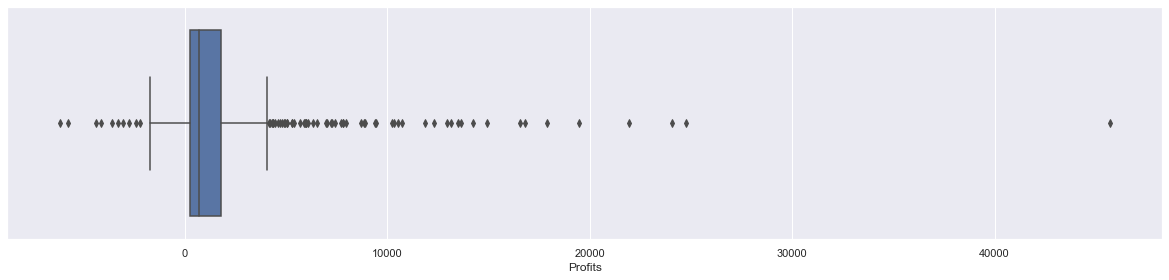

<Figure size 1080x576 with 0 Axes>

In [369]:
sns.boxplot(x= df['Profits'])
plt.figure(figsize = (15,8))
plt.show()

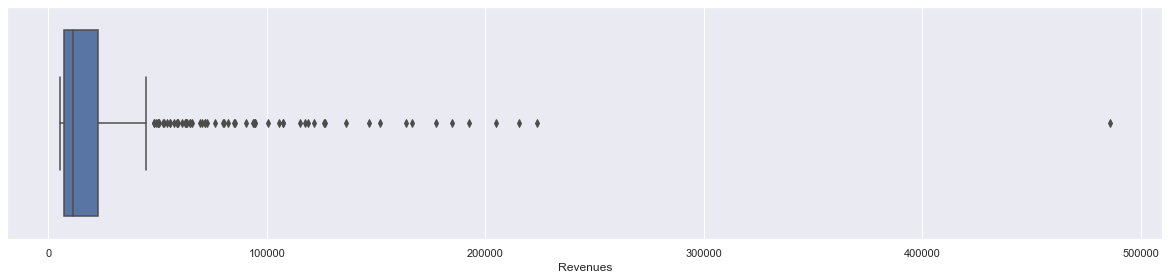

<Figure size 1080x576 with 0 Axes>

In [370]:
sns.boxplot(x= df['Revenues'])
plt.figure(figsize = (15,8))
plt.show()

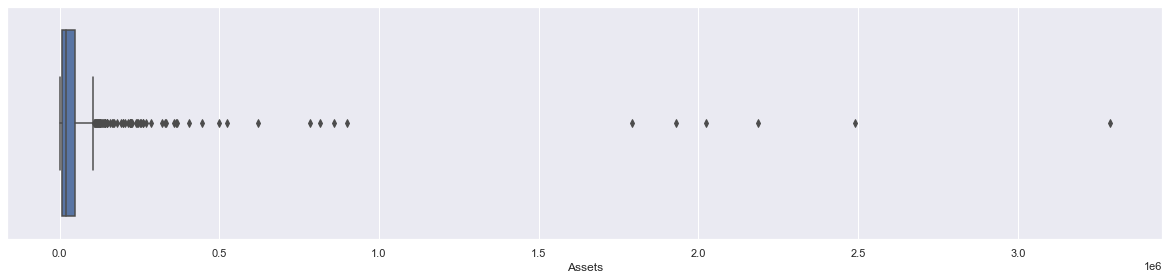

<Figure size 1080x576 with 0 Axes>

In [372]:
sns.boxplot(x= df['Assets'])
plt.figure(figsize = (15,8))
plt.show()

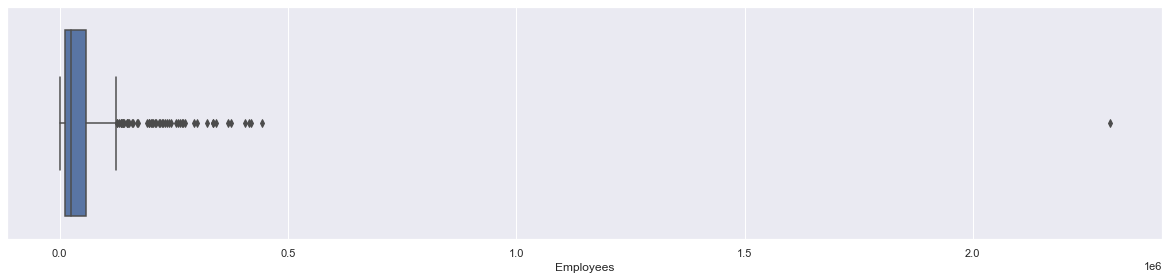

<Figure size 1080x576 with 0 Axes>

In [373]:
sns.boxplot(x= df['Employees'])
plt.figure(figsize = (15,8))
plt.show()

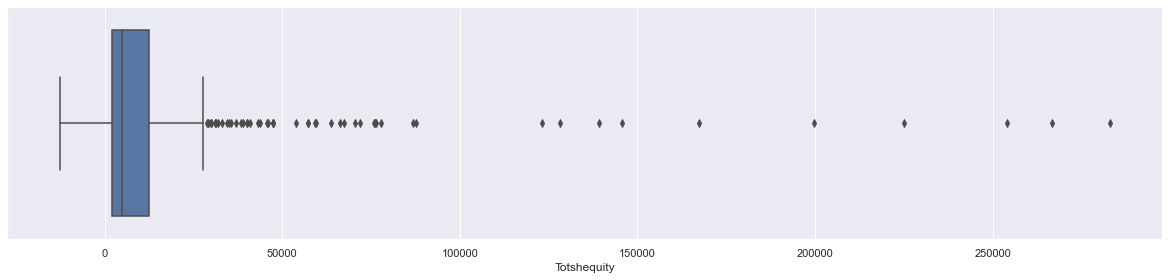

<Figure size 1080x576 with 0 Axes>

In [375]:
sns.boxplot(x= df['Totshequity'])
plt.figure(figsize = (15,8))
plt.show()

If the max value is 1.5 times the next highest value then that value can be counted as an outlier. It is important to identify outliers so the effect they have on the model can be minimised.

#### Checking Profits, Revenues, Assets, Employees and Totshequity for outliers

In [388]:
from scipy import stats
z = np.abs(stats.zscore(df['Profits']))
print(z)
threshold = 3
 
# Position of the outlier
prof_out = np.where(z > 3.5)
print(prof_out)

0       3.015930
1       5.667686
2      11.162118
3       1.540698
4       0.121649
         ...    
495     0.356232
496     0.355240
497     0.506856
498     0.506856
499     0.437836
Name: Profits, Length: 500, dtype: float64
(array([ 1,  2, 20, 24, 25, 26, 27, 34]),)


In [389]:
from scipy import stats
z = np.abs(stats.zscore(df['Revenues']))
print(z)
threshold = 3
 
# Position of the outlier
rev_out = np.where(z > 3.5)
print(rev_out)

0      12.056745
1       5.208811
2       5.000843
3       4.723159
4       4.396336
         ...    
495     0.493871
496     0.494576
497     0.494602
498     0.494732
499     0.495228
Name: Revenues, Length: 500, dtype: float64
(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),)


In [390]:
from scipy import stats
z = np.abs(stats.zscore(df['Assets']))
print(z)
threshold = 3
 
# Position of the outlier
asst_out = np.where(z > 3.5)
print(asst_out)

0      0.438399
1      2.000571
2      0.893178
3      0.925115
4      0.088195
         ...   
495    0.289616
496    0.261525
497    0.119584
498    0.241426
499    0.289124
Name: Assets, Length: 500, dtype: float64
(array([19, 20, 24, 25, 29, 38]),)


In [396]:
from scipy import stats
z = np.abs(stats.zscore(df['Employees']))
print(z)
threshold = 3
 
# Position of the outlier
emp_out = np.where(z > 3.5)
print(emp_out)

0      18.192467
1       2.524557
2       0.483666
3       0.132572
4       0.094462
         ...    
495     0.205550
496     0.422855
497     0.387989
498     0.420982
499     0.435016
Name: Employees, Length: 500, dtype: float64
(array([0]),)


In [397]:
from scipy import stats
z = np.abs(stats.zscore(df['Totshequity']))
print(z)
threshold = 3
 
# Position of the outlier
tot_out = np.where(z > 3.5)
print(tot_out)

0      2.104046
1      8.833642
2      3.758577
3      5.040068
4      0.154665
         ...   
495    0.503012
496    0.308637
497    0.570920
498    0.230979
499    0.415384
Name: Totshequity, Length: 500, dtype: float64
(array([ 1,  2,  3,  8, 18, 20, 24, 25, 26, 29]),)


In [405]:
outliers = [1,  2, 20, 24, 25, 26, 27, 34, 0, 1, 2, 3, 4, 5, 6, 7, 8, 19, 20, 24, 25, 29, 38, 0, 1,  2,  3,  8, 18, 20, 24, 25, 26, 29]
def Repeat(x):
    _size = len(x)
    repeated = []
    for i in range(_size):
        k = i + 1
        for j in range(k, _size):
            if x[i] == x[j] and x[i] not in repeated:
                repeated.append(x[i])
    return repeated
 
print(Repeat(outliers))
  

[1, 2, 20, 24, 25, 26, 0, 3, 8, 29]


According to z score companies at index 0,1,2,3,8,20,24,25,26,29 are outliers in multiple categories. They could cause the model to be unreliable at predicting other companies. However as the fortune 500 companies are a list of successful companines and the aim is to see what effects profits it could be counter intuitive to remove the "most successful" companies for different aspects as we remove the possibility to find out possible reasons why these companies are sucessful or the ability to identify companies the model shows are underperforming based on their features.

### Calculating the company with the highest profits.

In [179]:
#The index of the highest profiting company is found and the row printed
loc = df['Profits'].idxmax()
df.iloc[loc]

Rank                                     3
Title                                Apple
Employees                           116000
Sector                          Technology
Industry       Computers, Office Equipment
Hqcity                           Cupertino
Hqstate                                 CA
Revenues                            215639
Revchange                             -7.7
Profits                            45687.0
Prftchange                           -14.4
Assets                              321686
Totshequity                       128249.0
Name: 2, dtype: object

### Calculating the company with the highest revenue.

In [180]:
#The index of the company with the highest revenue is found and the row printed
loc = df['Revenues'].idxmax()
df.iloc[loc]

Rank                               1
Title                        Walmart
Employees                    2300000
Sector                     Retailing
Industry       General Merchandisers
Hqcity                   Bentonville
Hqstate                           AR
Revenues                      485873
Revchange                        0.8
Profits                      13643.0
Prftchange                      -7.2
Assets                        198825
Totshequity                  77798.0
Name: 0, dtype: object

### Calculating the company with the highest assets.

In [181]:
#The index of the company with the most assets is found and the row printed
loc = df['Assets'].idxmax()
df.iloc[loc]

Rank                               20
Title                      Fannie Mae
Employees                        7000
Sector                     Financials
Industry       Diversified Financials
Hqcity                     Washington
Hqstate                            DC
Revenues                       107162
Revchange                        -2.9
Profits                       12313.0
Prftchange                       12.4
Assets                        3287968
Totshequity                    6071.0
Name: 19, dtype: object

### Calculating the company with the highest number of employees

In [376]:
#The index of the company with the most employees is found and the row printed
loc = df['Employees'].idxmax()
df.iloc[loc]

Rank                               1
Title                        Walmart
Employees                    2300000
Sector                     Retailing
Industry       General Merchandisers
Hqcity                   Bentonville
Hqstate                           AR
Revenues                      485873
Revchange                        0.8
Profits                      13643.0
Prftchange                      -7.2
Assets                        198825
Totshequity                  77798.0
Name: 0, dtype: object

### Data which will not be used in the models are removed for clarity in the process of feature selection. This process is known as cleaning.
Data columns includle:
*  Website
*  Hqlocation
*  Hqaddr
*  Hqzip
*  Hqtel
*  Ceo
*  Ceo-title
*  Fullname
*  Ticker
*  Address

In [269]:
df.drop(columns=['Website','Hqlocation','Hqaddr','Hqzip','Hqtel','Ceo','Ceo-title','Fullname', 'Ticker', 'Address'], inplace=True)


In [200]:
#Shows the remaining columns in the data 
df.head()

,Rank,Title,Website,Employees,Sector,Industry,Hqlocation,Hqaddr,Hqcity,Hqstate,...,Ceo-title,Address,Ticker,Fullname,Revenues,Revchange,Profits,Prftchange,Assets,Totshequity
0,1,Walmart,http://www.walmart.com,2300000,Retailing,General Merchandisers,"Bentonville, AR",702 S.W. Eighth St.,Bentonville,AR,...,"President, Chief Executive Officer & Director","702 S.W. Eighth St., Bentonville, AR 72716",WMT,"Wal-Mart Stores, Inc.",485873,0.8,13643.0,-7.2,198825,77798.0
1,2,Berkshire Hathaway,http://www.berkshirehathaway.com,367700,Financials,Insurance: Property and Casualty (Stock),"Omaha, NE",3555 Farnam St.,Omaha,NE,...,Chairman & Chief Executive Officer,"3555 Farnam St., Omaha, NE 68131",BRKA,Berkshire Hathaway Inc.,223604,6.1,24074.0,0.0,620854,283001.0
2,3,Apple,http://www.apple.com,116000,Technology,"Computers, Office Equipment","Cupertino, CA",1 Infinite Loop,Cupertino,CA,...,Chief Executive Officer & Director,"1 Infinite Loop, Cupertino, CA 95014",AAPL,"Apple, Inc.",215639,-7.7,45687.0,-14.4,321686,128249.0
3,4,Exxon Mobil,http://www.exxonmobil.com,72700,Energy,Petroleum Refining,"Irving, TX",5959 Las Colinas Blvd.,Irving,TX,...,Chairman & Chief Executive Officer,"5959 Las Colinas Blvd., Irving, TX 75039",XOM,Exxon Mobil Corporation,205004,-16.7,7840.0,-51.5,330314,167325.0
4,5,McKesson,http://www.mckesson.com,68000,Wholesalers,Wholesalers: Health Care,"San Francisco, CA",1 Post St.,San Francisco,CA,...,"Chairman, President & Chief Executive Officer","1 Post St., San Francisco, CA 94104",MCK,McKesson Corporation,192487,6.2,2258.0,53.0,56563,8924.0


### Plotting a histagram to see the profit levels of all the fortune 500 companies in an attempt to identify trends and outliers.

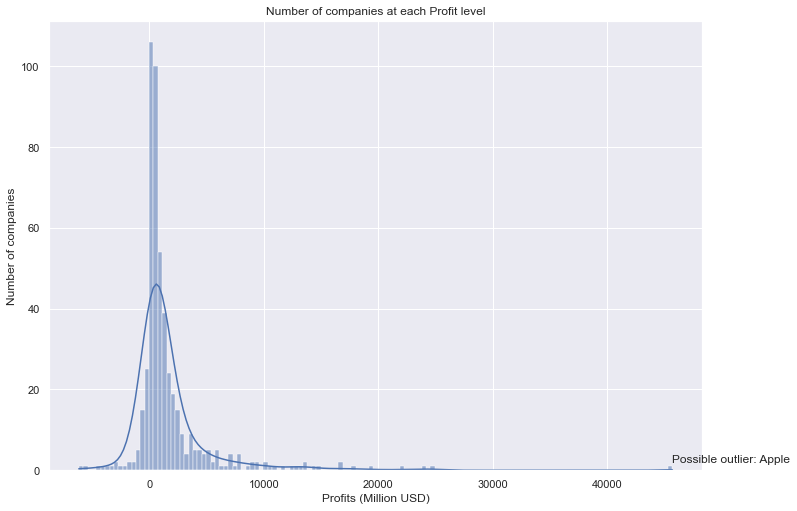

In [277]:
sns.histplot(data=df, x="Profits", palette = 'blend:#7AB,#EDA', kde=True)
plt.title('Number of companies at each Profit level')
plt.xlabel('Profits (Million USD)')
plt.ylabel('Number of companies')
plt.text(x=df.Profits[df.Profits==df.Profits.max()], y=2, s='Possible outlier: Apple')
plt.show()

A possible outlier has been identified as Apple, the graph has been constructed again without the outlier to see if the patterns are clearer.

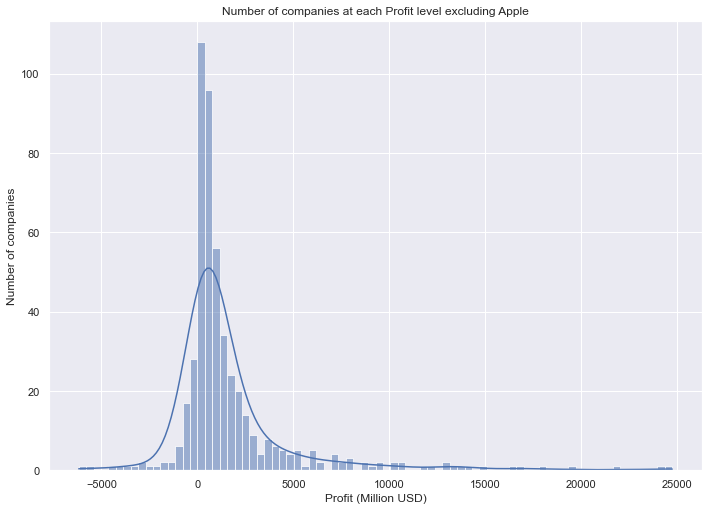

In [224]:
#Creates a new dataset without Apple
apple_removed_df = df.drop(2)

sns.histplot(data=apple_removed_df, x="Profits", cmap="crest", kde=True, stat='count')
plt.title('Number of companies at each Profit level excluding Apple')
plt.xlabel('Profit (Million USD)')
plt.ylabel('Number of companies')
plt.show()

### Plotting a countplot to see the number of fortune 500 companies in each sector.

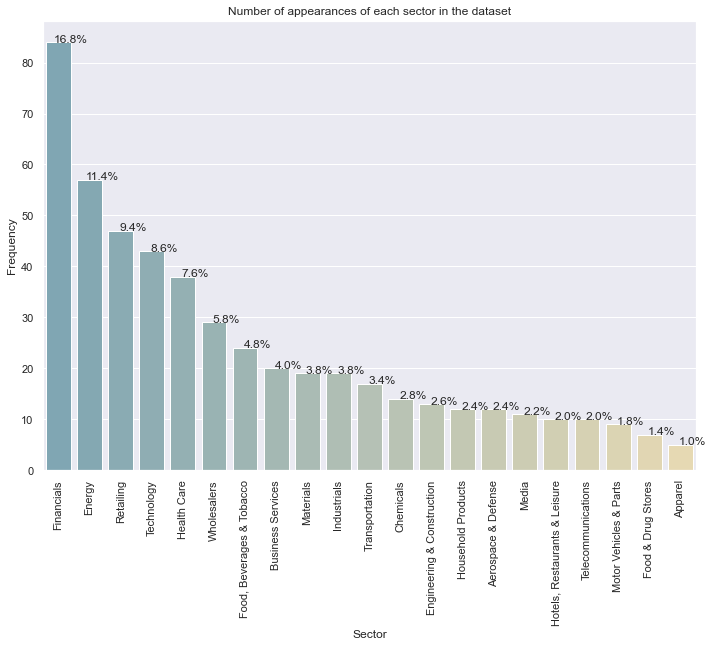

In [203]:
ax = sns.countplot(data=df, x='Sector', order=df.Sector.value_counts().index, palette='blend:#7AB,#EDA')
plt.title('Number of appearances of each sector in the dataset')
plt.xlabel('Sector')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
total = float(len(df))
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x,y),ha='center')
plt.show()

### Using box plots to see if there is a relation between profits and sector or revenue and sector.

The Figure shows that there are a some results which are outliers in almost every field. It also shows that the variance is quite low for all sectors other than telecommunications and the mean for all is very similar.

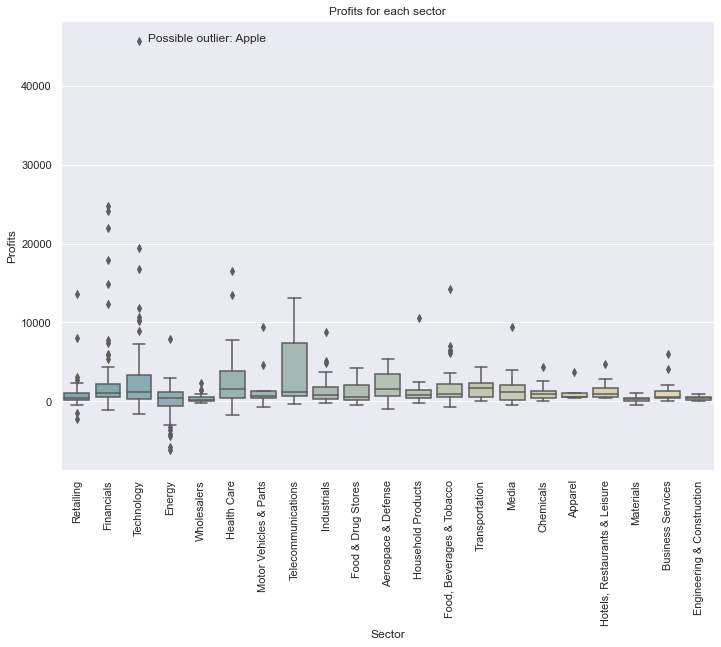

In [204]:
sns.boxplot(data=df, x='Sector', y='Profits', palette='blend:#7AB,#EDA')
plt.title('Profits for each sector')
plt.xlabel('Sector')
plt.ylabel('Profits')
plt.xticks(rotation=90)
plt.text(y=df.Profits[df.Profits==df.Profits.max()], x=2.3, s='Possible outlier: Apple')
plt.show()

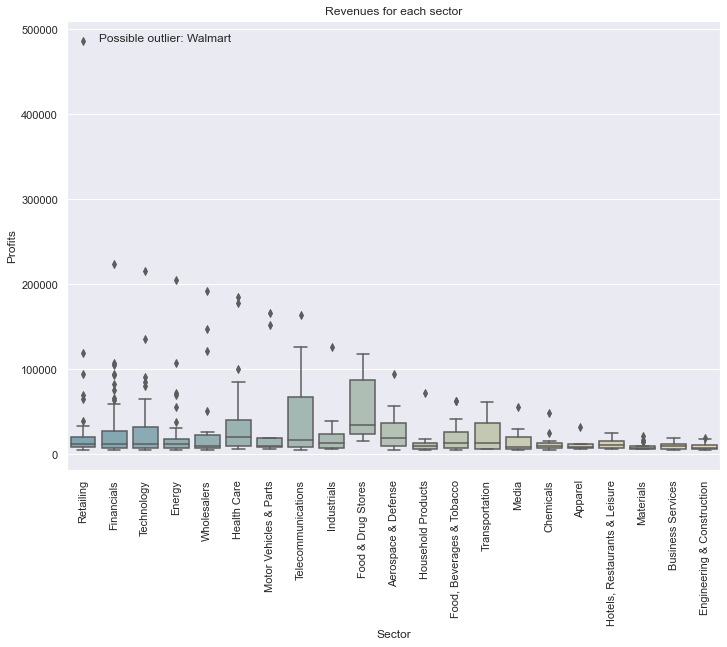

In [205]:
sns.boxplot(data=df, x='Sector', y='Revenues', palette='blend:#7AB,#EDA')
plt.title('Revenues for each sector')
plt.xlabel('Sector')
plt.ylabel('Profits')
plt.xticks(rotation=90)
plt.text(y=df.Revenues[df.Revenues==df.Revenues.max()], x=0.5, s='Possible outlier: Walmart')
plt.show()

### Corelations in the data <a class="anchor" id="corelation"></a>

[Back to contents](#contents)

#### Comparing Revenues with profits to see if there is a relationship between them.

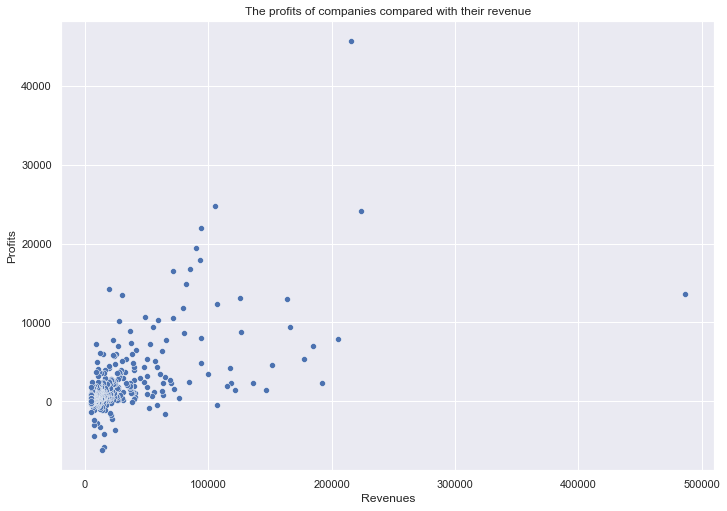

In [278]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
ax = sns.scatterplot(y ='Profits', x = 'Revenues', data = df, cmap="crest")
plt.title("The profits of companies compared with their revenue")
plt.show()

There are 2 outliers identified from the scatter plot above, one with significantly higher profits (Apple) and the other with significantly higher revenue (Walmart). 
In an attempt to discern a clearer pattern a graph without these outliers will be plotted

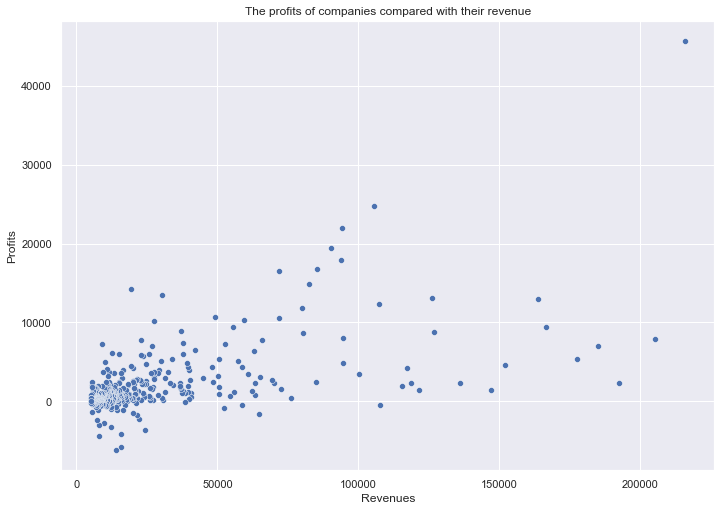

In [279]:
walmart_removed_df = df.drop(0)
apple_walmart_removed_df = walmart_removed_df.drop(1)
ax = sns.scatterplot(y ='Profits', x = 'Revenues', data = apple_walmart_removed_df, cmap="crest")
plt.title("The profits of companies compared with their revenue")
plt.show()

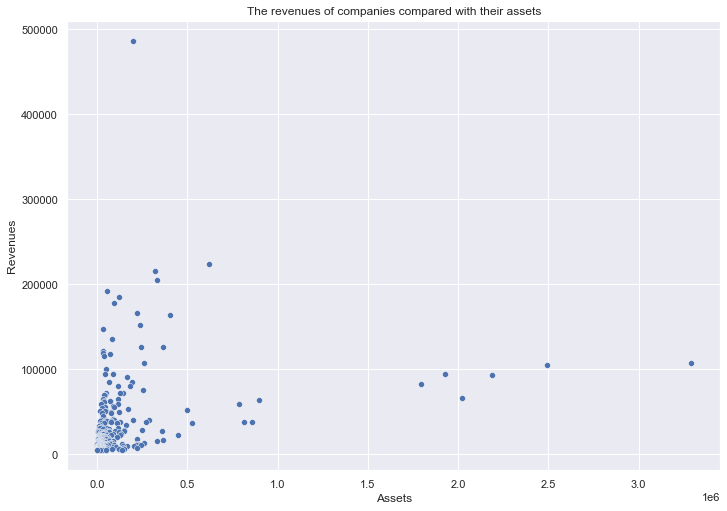

In [280]:
ax = sns.scatterplot(y ='Revenues', x = 'Assets', data = df, cmap="crest")
plt.title("The revenues of companies compared with their assets")
plt.show()

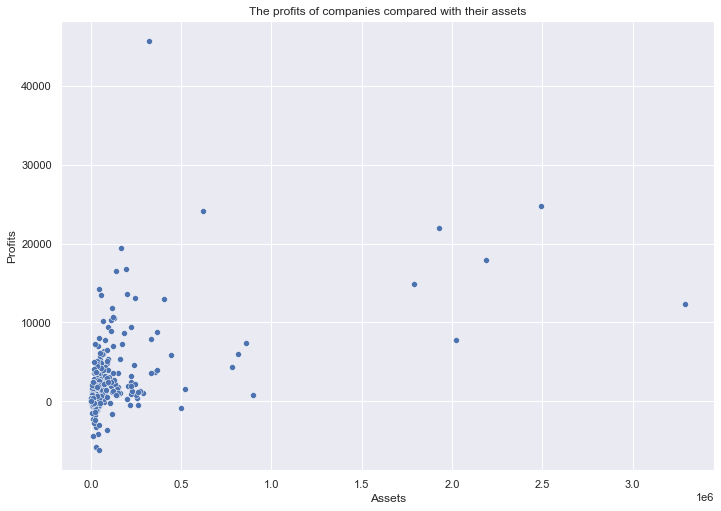

In [209]:
ax = sns.scatterplot(y ='Profits', x = 'Assets', data = df, cmap="crest")
plt.title("The profits of companies compared with their assets")
plt.show()

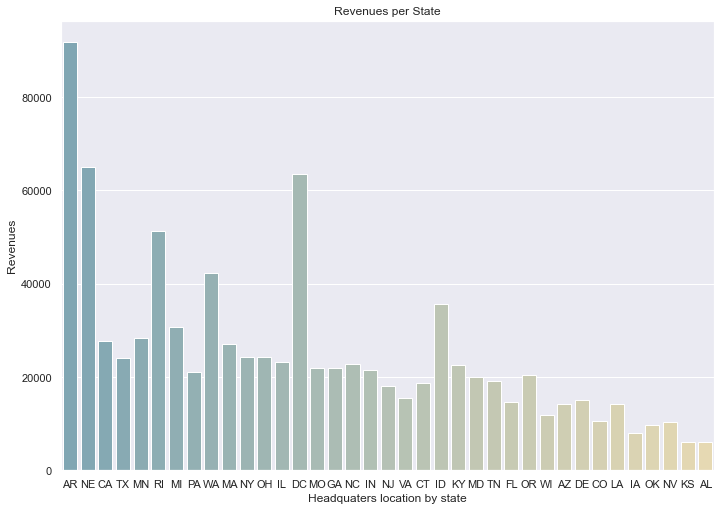

In [210]:
ax = sns.barplot(y ='Revenues', x = 'Hqstate', data = df, ci=None, palette = 'blend:#7AB,#EDA')
plt.title("Revenues per State")
plt.xlabel("Headquaters location by state")
plt.show()

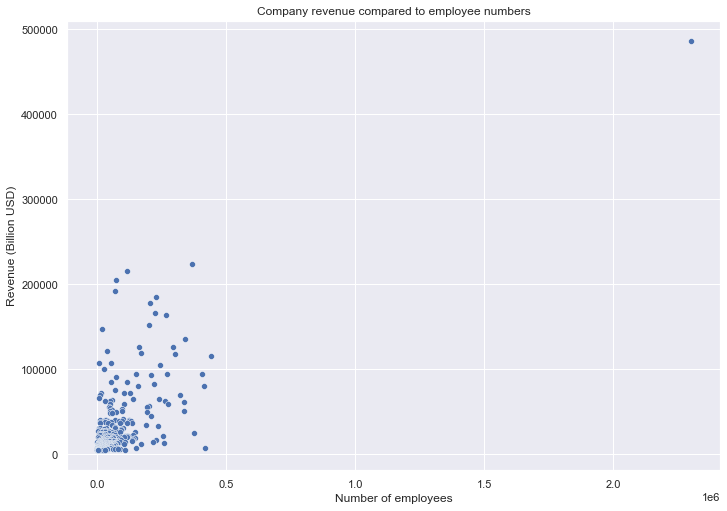

In [211]:
sns.scatterplot(data=df, x='Employees', y='Revenues', cmap="crest")
plt.title("Company revenue compared to employee numbers")
plt.xlabel("Number of employees")
plt.ylabel("Revenue (Billion USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

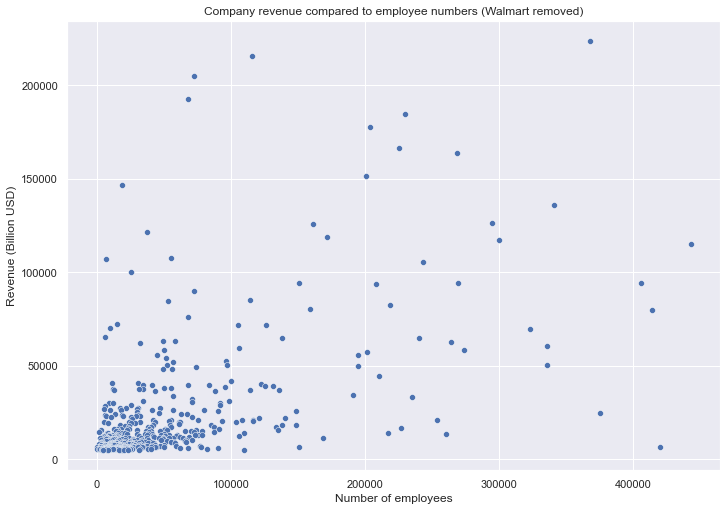

In [212]:
sns.scatterplot(data=walmart_removed_df, x='Employees', y='Revenues', cmap="crest")
plt.title("Company revenue compared to employee numbers (Walmart removed)")
plt.xlabel("Number of employees")
plt.ylabel("Revenue (Billion USD)")
plt.ticklabel_format(style='plain', axis='y')
plt.show()

### Pair plot showing the relationship between all linear variables.

Pair plots are a good method to identify trends for follow-up analysis. Seeing the relationships between all the numerical values unearth some patterns previously unspotted in the data.

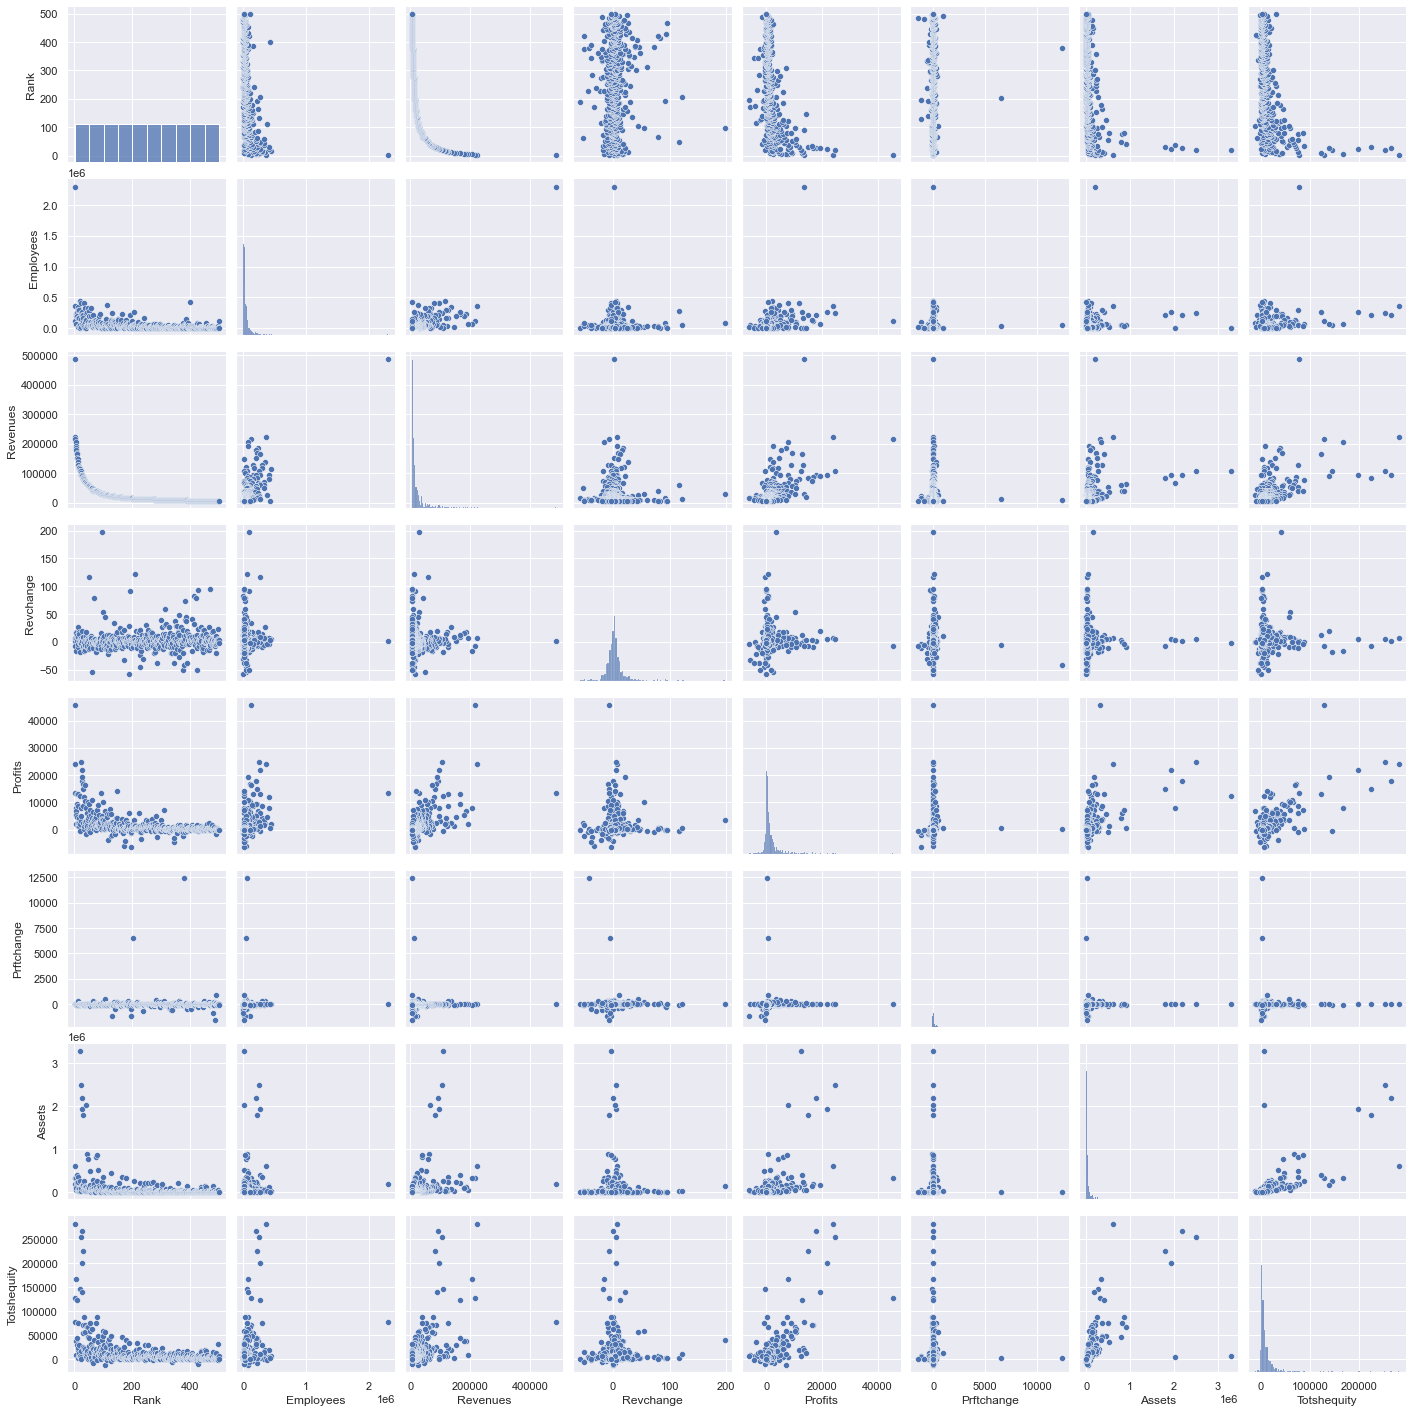

In [1071]:
sns.pairplot(df, diag_kind='hist')
plt.show()

Correlation heatmaps show the strength of the relationship between each of the values. The higher the number the stronger the correlation. Negative numbers have inverse correlation (as one goes up the other goes down).

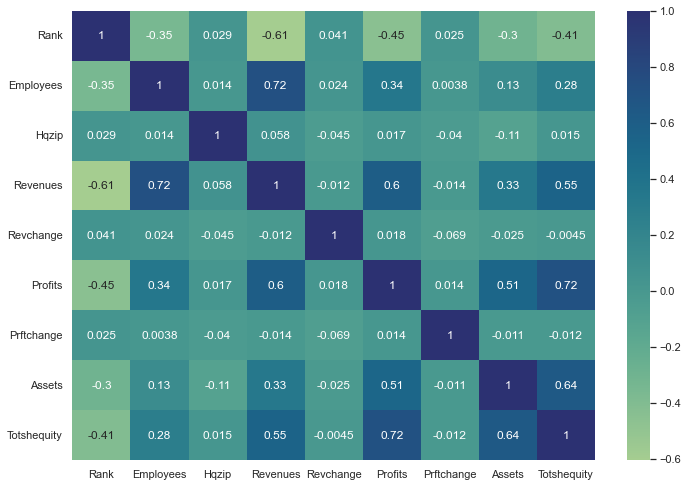

In [222]:
corr = df.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="crest")
plt.show()

By looking at the Profit row correlation between other variables can be determined. There seems to be a good correlation between Toshequity, Revenues, Assets and Employees. The features selceted by the model will be decided by an algorithm but this map gives a clue as to what they may be.

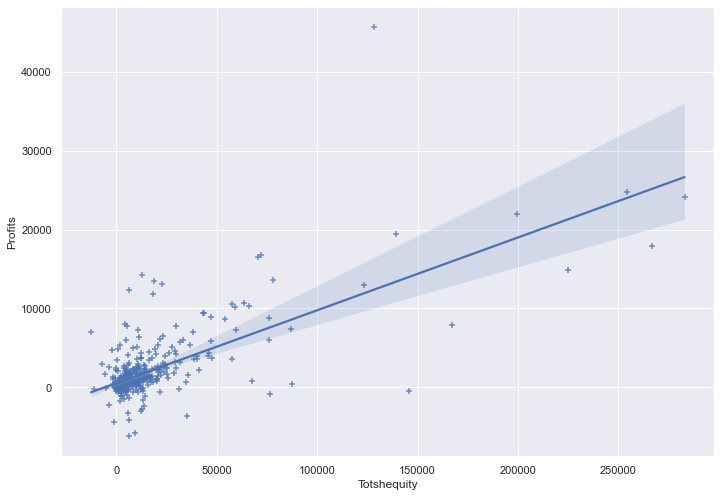

In [852]:
sns.regplot(y=df.Profits, x=df.Totshequity, marker="+")
plt.show()

# Section 2: Machine Learning Models<a class="anchor" id="section2"></a>

Now that the dataset has been explored, cleaned of extra features and outliers have been identified and removed from the dataset, it is time to begin training some models.

[Back to contents](#contents)

## Model 1 - Multiple Linear Regression 

This model uses multiple variables to predict a target feature. It is similar to linear regression which is a simpler form wich only takes 1 variable to predict a target feature.

In [865]:
#Importing models needed to perform Multiple regression.
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

### Model 1.1 <a class="anchor" id="model1.1"></a>
Firstly, the model will be constructed using features identified as having a good correlation with the target value profits. The dataset including outliers like Walmart, Apple and Fannie Mae who have higher Revenues, Profits and Assets respectively. The features will not be scaled in this model to get a base line to see if standardisation improves the predictions. The predicted results will be plotted against the true profits and the mean squared error will be calculated.

[Back to contents](#contents)

In [1061]:
# feature selection: This function selectes the best 4 features to use to 
#predict profits based of the statistical method that takes the best k features where k is defined as a function.
def select_features(X_train, y_train, X_test):
 # configure to select a subset of features
 fs = SelectKBest(score_func=f_regression, k=4)
 # learn relationship from training data
 fs.fit(X_train, y_train)
 # transform train input data
 X_train_fs = fs.transform(X_train)
 # transform test input data
 X_test_fs = fs.transform(X_test)
 return X_train_fs, X_test_fs, fs

In [871]:
#Setting X as the variables Employees, Revenues, Assets, Total Shared Equity and Profit Change to predict y.
#Setting y as the target value to predict Profit.
X1 = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y1 = df['Profits']
print(X1)
print('-----------------------------------------------')
print(y1)
print('-----------------------------------------------')


     Employees  Revenues  Assets  Totshequity  Revchange  Prftchange
0      2300000    485873  198825      77798.0        0.8        -7.2
1       367700    223604  620854     283001.0        6.1         0.0
2       116000    215639  321686     128249.0       -7.7       -14.4
3        72700    205004  330314     167325.0      -16.7       -51.5
4        68000    192487   56563       8924.0        6.2        53.0
..         ...       ...     ...          ...        ...         ...
495      31000      5197    2148      -1698.0        5.8         4.2
496       4200      5170    9737       4229.0       23.9         5.2
497       8500      5169   48083      31049.0        4.0         5.2
498       4431      5164   15167       6597.0        4.0         5.2
499     110000      5145    2281        974.0       -2.8       -25.0

[500 rows x 6 columns]
-----------------------------------------------
0      13643.0
1      24074.0
2      45687.0
3       7840.0
4       2258.0
        ...   
495      3

A solution to overfitting is a procedure called cross-validation (CV for short). K-fold CV, the training set is split into k smaller sets. A procedure is then carried out on all k training sets:

A model is trained using $k-1$ of the folds as training data;

the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).

The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. 

In [872]:
#K Fold validation splits the data into multiple sets and tests the models 
#accuracy to avoid selecting an overfitted model
cv = KFold(n_splits=8, random_state=1, shuffle=True) 

Data is split into testing and training data, 30% is testing data and the other 70% is training data. This is done using the skit-learn package.

In [982]:
x1_train, x1_test, y1_train, y1_test = train_test_split(X1 , y1, test_size = 0.3)
x1_train_fs, x1_test_fs, fs = select_features(x1_train, y1_train, x1_test)

A linear regression model is fit to the training data and the negative root mean squared error for the k fold cross validation is calculated.

In [1062]:
regr = linear_model.LinearRegression()
regr.fit(x1_train_fs, y1_train)
scores1 = cross_val_score(regr, x1_test_fs, y1_test, cv=cv, scoring = 'neg_root_mean_squared_error')

The coefficients show how much the factor impacts the prediction. If a coeffcient is larger than others then it has a bigger impact.

In [1063]:
predictions = regr.predict(x1_test_fs)
pd.DataFrame(regr.coef_, ['Employees' , "Revenues", "Assets", "Totshequity"], columns = ['Coefficient'])

,Coefficient
Employees,0.001907
Revenues,0.018877
Assets,0.002524
Totshequity,0.051798


A good way to analysis the sucess of each model is to visualise the data. The graph below shows the predicted profit values against the true profit values. A completely accurate prediction will fall on the green dotted line x=y.

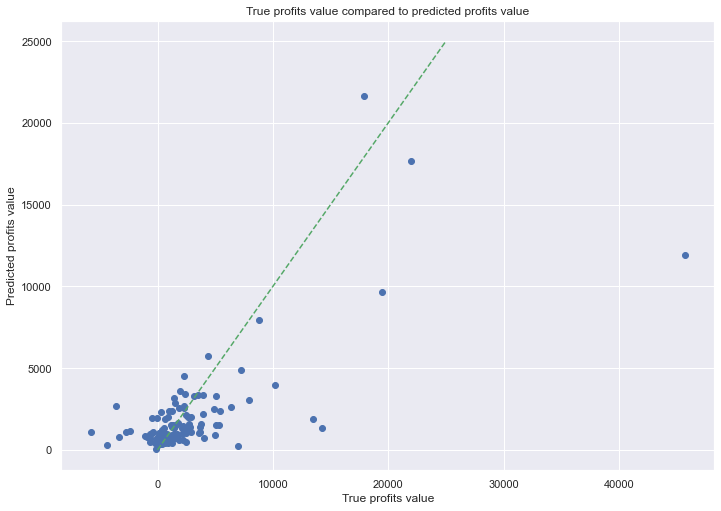

In [1065]:
plt.scatter(y1_test, predictions)
plt.plot([0,10000,25000],[0, 10000,25000], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

This histogram shows the frequency of different bands of error. A successful model will have a very large band around 0 and very little anywhere else.

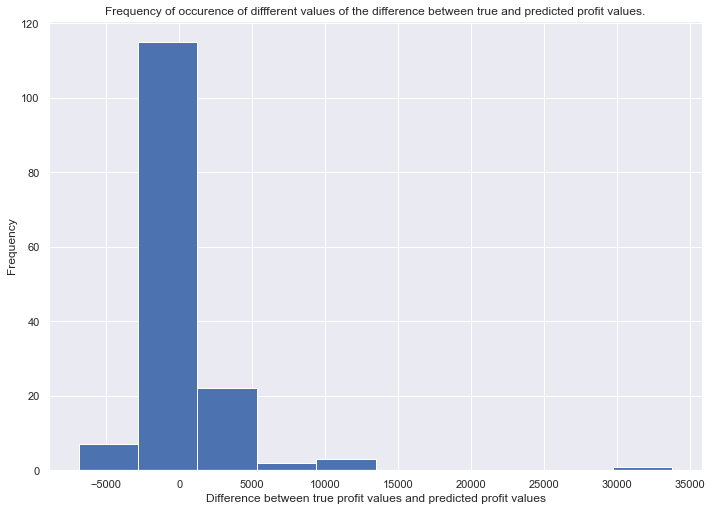

In [986]:
plt.hist(y1_test - predictions)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

This graph plots Predicted profits against true profits, it highlights that the model has difficulty predicting negative profits.

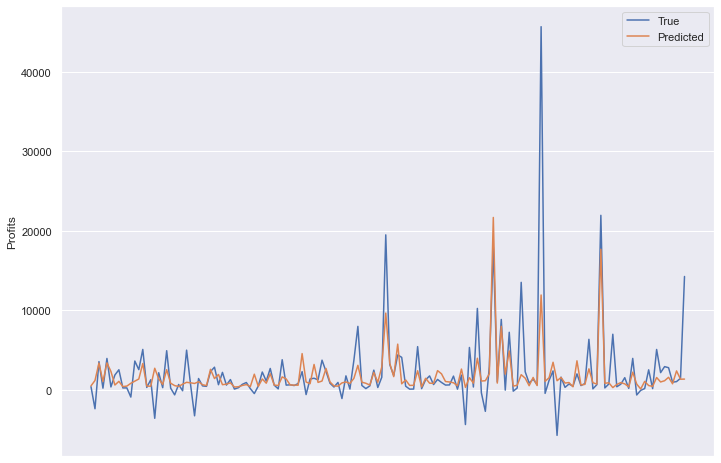

In [1072]:
pred1_df = pd.DataFrame(predictions)
x1_df = pd.DataFrame(x1_test.iloc[:,0])

plt.plot(range(len(y1_test)), y1_test)
plt.plot(range(len(predictions)), predictions)
plt.ylabel('Profits')
plt.legend(['True', 'Predicted'])
plt.xticks(())

plt.show()

There are multiple possible metrics to measure the performance of the model. The selected metrics are explained below.

Negative Root Mean Squared Error (NRMSE) is the negative root average of the difference between the Original Values and the Predicted Values on the cross validated set.
An accurate model will minimise the Negative Root Mean Squared Error.

Given by the equation below:

$NRMSE = -\sqrt{\frac{\sum \limits _{j=1} ^{N} ( y_{j} - \hat{ y_{j}} )^2}{N}}$ 

R-Squared is a statistical measure of fit that indicates how much variation of a dependent variable is explained by the independent variable(s) in a regression model.

Mean Absolute Error (MAE) is the average of the difference between the Original Values and the Predicted Values. 
An accurate model will minimise the mean absolute error.

Given by the equation:

$MAE = \frac{1}{N} \sum \limits _{j=1} ^{N} | y_{j} - \hat{ y_{j}} |$ 

Mean Squared Error takes the average of the square of the difference between the original values and the predicted values.
An accurate model will minimise the mean squared error.

Given by the equation:

$MSE = \frac{1}{N}  \sum \limits _{j=1} ^{N} ( y_{j} - \hat{ y_{j}} )^2$ 

MAE gives an idea of how far away predictions are from the true values, it is sensitive to results with opposite signs as negative results can cancel out positive results. 
MSE does not have this problem as all values are positve. It is sensitive to outliers as large numbers get much bigger when squared than normal numbers. 

ALl of these metrics will be calculated to give a holistic look at how accurate the model is.

In [1082]:
#Using sklearns metric package mean absolute error and mean squared error can be calculated.
mae = metrics.mean_absolute_error(y1_test, predictions)
mse = metrics.mean_squared_error(y1_test, predictions)
r2 = metrics.r2_score(y1_test, predictions)
print('-----------------------------------------------')
print(f"Negegative root mean squared error : mean: {scores1.mean()} standard deviation: {scores1.std()}")
print('-----------------------------------------------')
print('R2 score = ', (r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negegative root mean squared error : mean: -3751.7904556094645 standard deviation: 1612.6874280629756
-----------------------------------------------
R2 score =  0.476557164892749
-----------------------------------------------
Mean absolute error =  1614.3102545091467
-----------------------------------------------
Mean squared error =  13623524.069081588
-----------------------------------------------


### Model 1.2 <a class="anchor" id="model1.2"></a>
This model will be the same as the previous model other than the fact all features will be standardised using the StandardScaler method in sklearn. 

[Back to contents](#contents)

In [1123]:
df_scaled = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits']]
df_scaled = StandardScaler().fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits'])
X2 = df_scaled[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y2 = df_scaled['Profits']
print(X2)
print('-----------------------------------------------')
print(y2)
print('-----------------------------------------------')

     Employees   Revenues    Assets  Totshequity  Revchange  Prftchange
0    18.192467  12.056745  0.438399     2.104046  -0.148289   -0.052097
1     2.524557   5.208811  2.000571     8.833642   0.117408   -0.040993
2     0.483666   5.000843  0.893178     3.758577  -0.574408   -0.063202
3     0.132572   4.723159  0.925115     5.040068  -1.025592   -0.120421
4     0.094462   4.396336 -0.088195    -0.154665   0.122421    0.040749
..         ...        ...       ...          ...        ...         ...
495  -0.205550  -0.493871 -0.289616    -0.503012   0.102369   -0.034515
496  -0.422855  -0.494576 -0.261525    -0.308637   1.009750   -0.032973
497  -0.387989  -0.494602 -0.119584     0.570920   0.012132   -0.032973
498  -0.420982  -0.494732 -0.241426    -0.230979   0.012132   -0.032973
499   0.435016  -0.495228 -0.289124    -0.415384  -0.328763   -0.079550

[500 rows x 6 columns]
-----------------------------------------------
0       3.015930
1       5.667686
2      11.162118
3       1.540

In [1124]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

In [1125]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2 , y2, test_size = 0.3)
X2_train_fs, X2_test_fs, fs = select_features(X2_train, y2_train, X2_test)

In [1167]:
regr = linear_model.LinearRegression()
regr.fit(X2_train_fs, y2_train)
scores2 = cross_val_score(regr, X2_test, y2_test, cv=cv, scoring = 'neg_root_mean_squared_error')

In [1127]:
predictions2 = regr.predict(X2_test_fs)
pd.DataFrame(regr.coef_, ['Employees', 'Revenues', "Assets", "Totshequity"], columns = ['Coefficient'])


,Coefficient
Employees,-0.074261
Revenues,0.360205
Assets,0.119924
Totshequity,0.474350


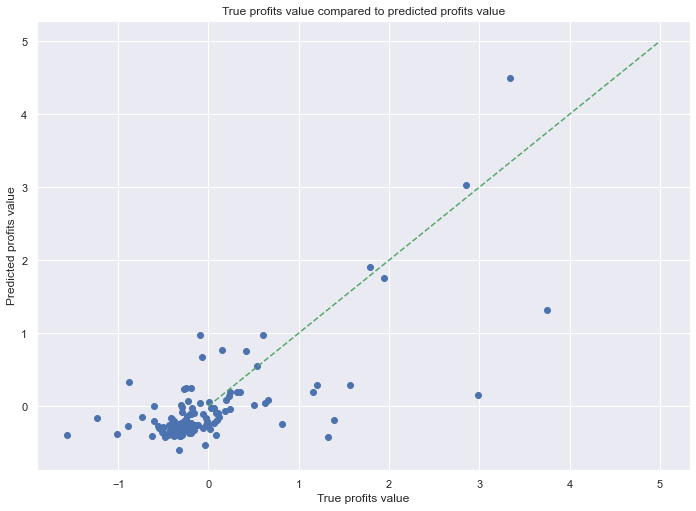

In [1128]:
plt.scatter(y2_test, predictions2)
plt.plot([0,1,5],[0, 1,5], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

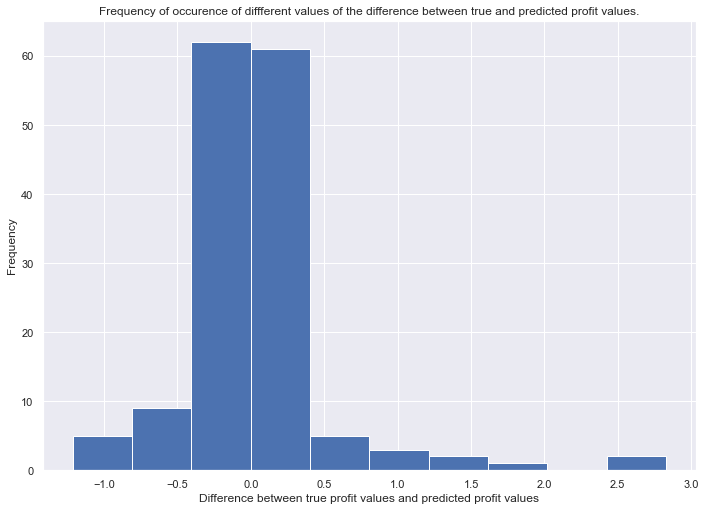

In [1129]:
plt.hist(y2_test - predictions2)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

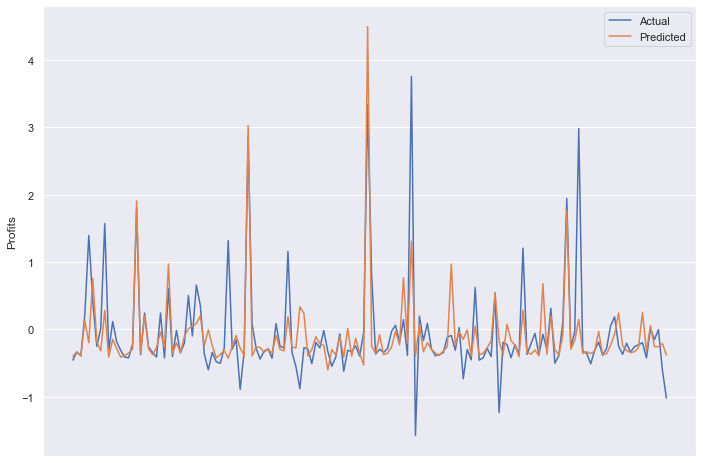

In [1130]:
pred2_df = pd.DataFrame(predictions2)
x2_df = pd.DataFrame(X2_test.iloc[:,0])

plt.plot(range(len(y2_test)), y2_test)
plt.plot(range(len(predictions2)), predictions2)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()

In [1132]:
#Using sklearns metric package mean absolute error and mean squared error can be calculated.
mae2 = metrics.mean_absolute_error(y2_test, predictions2)
mse2 = metrics.mean_squared_error(y2_test, predictions2)
r2_2 = metrics.r2_score(y2_test, predictions2)
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores2.mean()} standard deviation: {scores2.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negative root mean squared error: mean: -0.6299711990022783 standard deviation: 0.4322145670772607
-----------------------------------------------
R2 score =  0.5264293469574413
-----------------------------------------------
Mean absolute error =  0.27009261092725895
-----------------------------------------------
Mean squared error =  0.2520722214947627
-----------------------------------------------


### Model 1.3 <a class="anchor" id="model1.3"></a>
This model will remove companies that or outliers in multiple categories in the features and preditcted values.

[Back to contents](#contents)

In [997]:
df_no_out = df.drop([1, 2, 20, 24, 25, 26, 0, 3, 8, 29])
df_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 4 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         490 non-null    int64  
 1   Title        490 non-null    object 
 2   Employees    490 non-null    int64  
 3   Sector       490 non-null    object 
 4   Industry     490 non-null    object 
 5   Hqcity       490 non-null    object 
 6   Hqstate      490 non-null    object 
 7   Revenues     490 non-null    int64  
 8   Revchange    490 non-null    float64
 9   Profits      490 non-null    float64
 10  Prftchange   490 non-null    float64
 11  Assets       490 non-null    int64  
 12  Totshequity  490 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 53.6+ KB


In [998]:
#Setting X as the variables Employees, Revenues, Assets, Total Shared Equity and Profit Change to predict y.
#Setting y as the target value to predict Profit.
X3 = df_no_out[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y3 = df_no_out['Profits']
print(X3)
print('-----------------------------------------------')
print(y3)
print('-----------------------------------------------')

     Employees  Revenues  Assets  Totshequity  Revchange  Prftchange
4        68000    192487   56563       8924.0        6.2        53.0
5       230000    184840  122810      38274.0       17.7        20.7
6       204000    177526   94462      36830.0       15.8         1.5
7       225000    166380  221690      43836.0        9.2        -2.7
9       201000    151800  237951      29170.0        1.5       -37.7
..         ...       ...     ...          ...        ...         ...
495      31000      5197    2148      -1698.0        5.8         4.2
496       4200      5170    9737       4229.0       23.9         5.2
497       8500      5169   48083      31049.0        4.0         5.2
498       4431      5164   15167       6597.0        4.0         5.2
499     110000      5145    2281        974.0       -2.8       -25.0

[490 rows x 6 columns]
-----------------------------------------------
4      2258.0
5      7017.0
6      5317.0
7      9427.0
9      4596.0
        ...  
495     378.2
49

In [999]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

In [1001]:
X3_train, X3_test, y3_train, y3_test = train_test_split(X3 , y3, test_size = 0.3)
#Selecting the best 4 features to use
X3_train_fs, X3_test_fs, fs = select_features(X3_train, y3_train, X3_test)

In [1002]:
regr = linear_model.LinearRegression()
regr.fit(X3_train_fs, y3_train)
scores3 = cross_val_score(regr, X3_test_fs, y3_test, cv=6, scoring = 'neg_root_mean_squared_error')

In [1003]:
predictions3 = regr.predict(X3_test_fs)
pd.DataFrame(regr.coef_, ['Employees' , 'Revenues' , 'Assets' , 'Totshequity'], columns = ['Coefficient'])

,Coefficient
Employees,0.004448
Revenues,0.018087
Assets,0.001869
Totshequity,0.087521


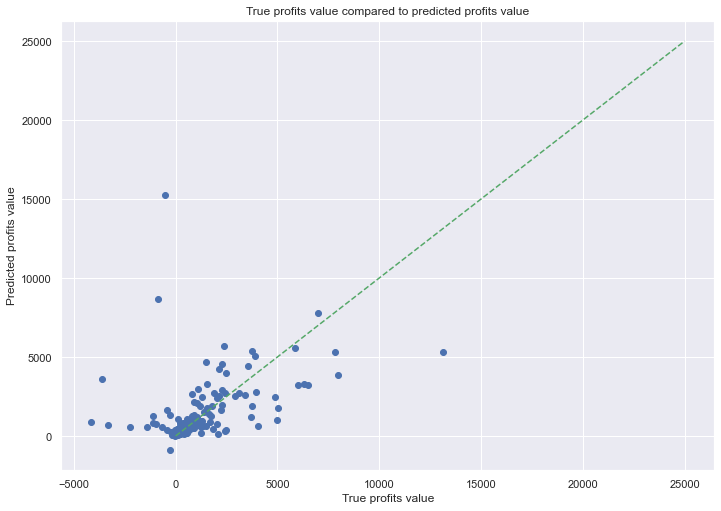

In [1004]:
plt.scatter(y3_test, predictions3)
plt.plot([0,10000,25000],[0, 10000,25000], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

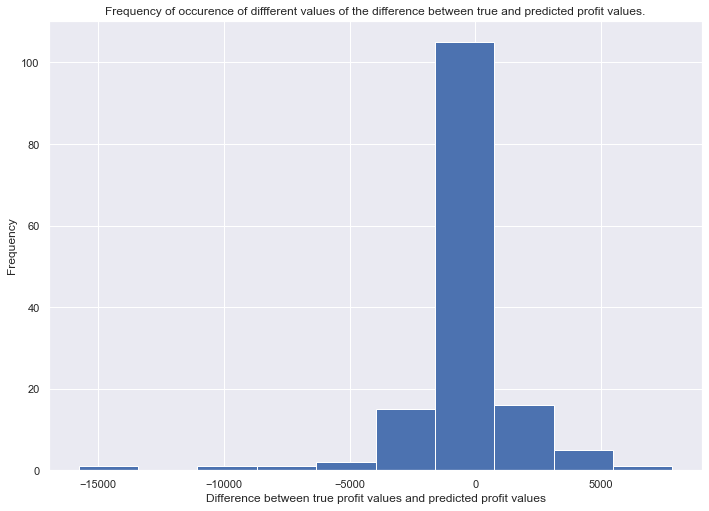

In [1005]:
plt.hist(y3_test - predictions3)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

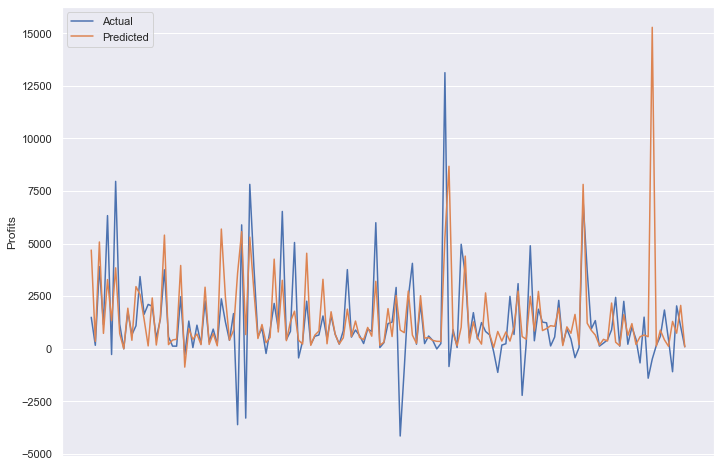

In [1057]:
pred3_df = pd.DataFrame(predictions3)
x3_df = pd.DataFrame(X3_test.iloc[:,0])

plt.plot(range(len(y3_test)), y3_test)
plt.plot(range(len(predictions3)), predictions3)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()

In [1006]:
mae = metrics.mean_absolute_error(y3_test, predictions3)
mse = metrics.mean_squared_error(y3_test, predictions3)
r2 = metrics.r2_score(y3_test, predictions3)
print('-----------------------------------------------')
print(f"Negative Root Mean squared error: mean: {scores3.mean()} standard deviation: {scores3.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negative Root Mean squared error: mean: -1828.0764190904802 standard deviation: 447.4077844669261
-----------------------------------------------
R2 score =  -0.08334878618751551
-----------------------------------------------
Mean absolute error =  1109.5690675450041
-----------------------------------------------
Mean squared error =  4869886.615090279
-----------------------------------------------


### Model 1.4 <a class="anchor" id="model1.4"></a>
This model will have the same outliers removed and it will be scaled.

[Back to contents](#contents)

In [1007]:
df_no_out = df.drop([1, 2, 20, 24, 25, 26, 0, 3, 8, 29])
df_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 4 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         490 non-null    int64  
 1   Title        490 non-null    object 
 2   Employees    490 non-null    int64  
 3   Sector       490 non-null    object 
 4   Industry     490 non-null    object 
 5   Hqcity       490 non-null    object 
 6   Hqstate      490 non-null    object 
 7   Revenues     490 non-null    int64  
 8   Revchange    490 non-null    float64
 9   Profits      490 non-null    float64
 10  Prftchange   490 non-null    float64
 11  Assets       490 non-null    int64  
 12  Totshequity  490 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 53.6+ KB


In [1008]:
df_scaled = df_no_out[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits']]
df_scaled = StandardScaler().fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits'])
X4 = df_scaled[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y4 = df_scaled['Profits']
print(X4)
print('-----------------------------------------------')
print(y4)
print('-----------------------------------------------')

     Employees  Revenues    Assets  Totshequity  Revchange  Prftchange
0     0.278342  6.303331 -0.021002    -0.077202   0.119465    0.039323
1     2.658880  6.022231  0.314013     1.827107   0.691657   -0.009994
2     2.276819  5.753372  0.170656     1.733417   0.597121   -0.039309
3     2.585407  5.343650  0.814055     2.187985   0.268732   -0.045722
4     2.232735  4.807697  0.896288     1.236414  -0.114388   -0.099161
..         ...       ...       ...          ...        ...         ...
485  -0.265362 -0.581360 -0.296181    -0.766387   0.099562   -0.035186
486  -0.659179 -0.582352 -0.257803    -0.381827   1.000143   -0.033660
487  -0.595992 -0.582389 -0.063885     1.358329   0.010002   -0.033660
488  -0.655785 -0.582573 -0.230344    -0.228185   0.010002   -0.033660
489   0.895518 -0.583271 -0.295509    -0.593021  -0.328338   -0.079770

[490 rows x 6 columns]
-----------------------------------------------
0      0.332215
1      2.177311
2      1.518209
3      3.111684
4      1.238

In [1009]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

In [1010]:
X4_train, X4_test, y4_train, y4_test = train_test_split(X4 , y4, test_size = 0.3)
X4_train_fs, X4_test_fs, fs = select_features(X4_train, y4_train, X4_test)

In [1011]:
regr = linear_model.LinearRegression()
regr.fit(X4_train_fs, y4_train)
scores4 = cross_val_score(regr, X4_test_fs, y4_test, cv=6, scoring = 'neg_root_mean_squared_error')

In [1012]:
predictions4 = regr.predict(X4_test_fs)
pd.DataFrame(regr.coef_, ['Employees', "Revenues", 'Assets', "Totshequity"], columns = ['Coefficient'])

,Coefficient
Employees,0.205821
Revenues,0.187485
Assets,0.221461
Totshequity,0.336020


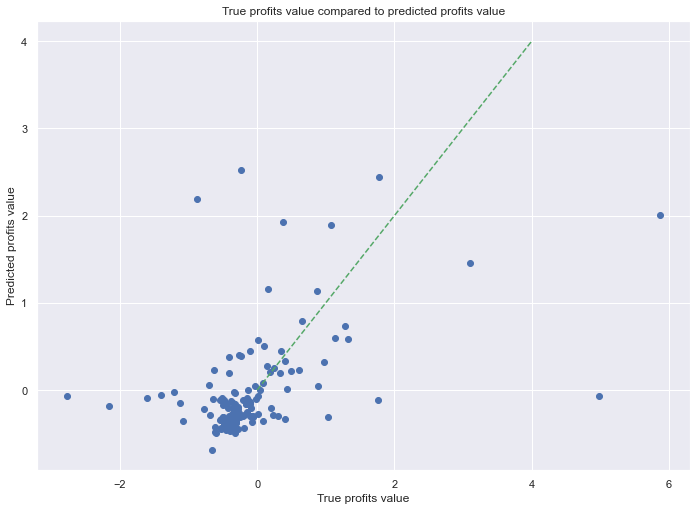

In [1013]:
plt.scatter(y4_test, predictions4)
plt.plot([0,1,4],[0, 1,4], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

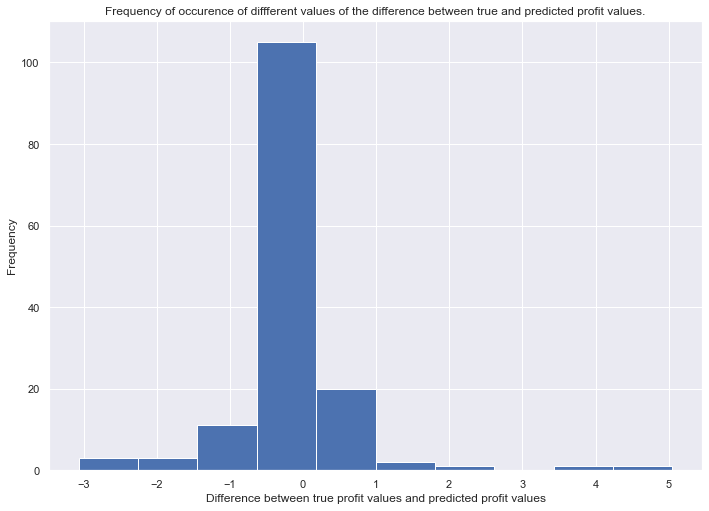

In [1014]:
plt.hist(y4_test - predictions4)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

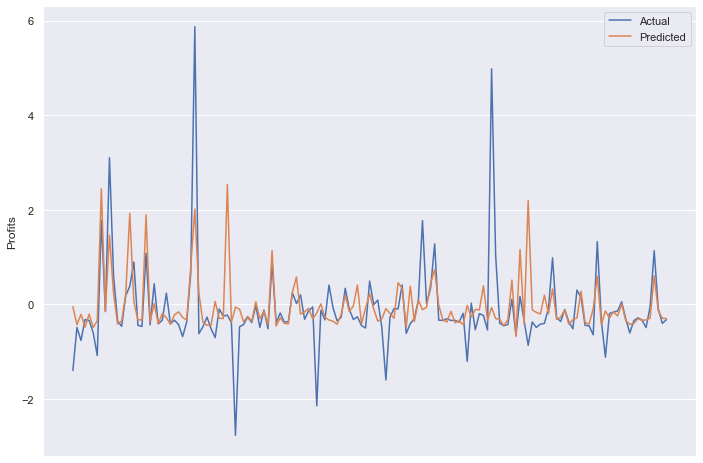

In [1056]:
pred4_df = pd.DataFrame(predictions4)
x4_df = pd.DataFrame(X4_test.iloc[:,0])

plt.plot(range(len(y4_test)), y4_test)
plt.plot(range(len(predictions4)), predictions4)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()

In [1015]:
mae = metrics.mean_absolute_error(y4_test, predictions4)
mse = metrics.mean_squared_error(y4_test, predictions4)
r2 = metrics.r2_score(y4_test, predictions4)
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores4.mean()} standard deviation: {scores4.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negative root mean squared error: mean: -0.7700882968458472 standard deviation: 0.3108399517506382
-----------------------------------------------
R2 score =  0.18655016233810984
-----------------------------------------------
Mean absolute error =  0.4087292012206882
-----------------------------------------------
Mean squared error =  0.6751156158950178
-----------------------------------------------


### Model 1.5 <a class="anchor" id="model1.5"></a>
Trying 6 features instead of 4 to see if they produce more accurate results. Data is not scaled for this attempt.

[Back to contents](#contents)

In [1016]:
#Setting X as the variables Employees, Revenues, Assets, Total Shared Equity and Profit Change to predict y.
#Setting y as the target value to predict Profit.
X5 = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y5 = df['Profits']
print(X5)
print('-----------------------------------------------')
print(y5)
print('-----------------------------------------------')

     Employees  Revenues  Assets  Totshequity  Revchange  Prftchange
0      2300000    485873  198825      77798.0        0.8        -7.2
1       367700    223604  620854     283001.0        6.1         0.0
2       116000    215639  321686     128249.0       -7.7       -14.4
3        72700    205004  330314     167325.0      -16.7       -51.5
4        68000    192487   56563       8924.0        6.2        53.0
..         ...       ...     ...          ...        ...         ...
495      31000      5197    2148      -1698.0        5.8         4.2
496       4200      5170    9737       4229.0       23.9         5.2
497       8500      5169   48083      31049.0        4.0         5.2
498       4431      5164   15167       6597.0        4.0         5.2
499     110000      5145    2281        974.0       -2.8       -25.0

[500 rows x 6 columns]
-----------------------------------------------
0      13643.0
1      24074.0
2      45687.0
3       7840.0
4       2258.0
        ...   
495      3

In [1017]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

In [1018]:
x5_train, x5_test, y5_train, y5_test = train_test_split(X5 , y5, test_size = 0.3)

In [1020]:
regr = linear_model.LinearRegression()
regr.fit(x5_train, y5_train)
scores5 = cross_val_score(regr, x5_test, y5_test, cv=6, scoring = 'neg_root_mean_squared_error')

In [1021]:
predictions5 = regr.predict(x5_test)
pd.DataFrame(regr.coef_, ["Employees", "Revenues", "Assets", "Totshequity", 'Revchange', 'Prftchange' ], columns = ['Coefficient'])

,Coefficient
Employees,0.000941
Revenues,0.019548
Assets,0.002357
Totshequity,0.065574
Revchange,2.492985
Prftchange,0.099794


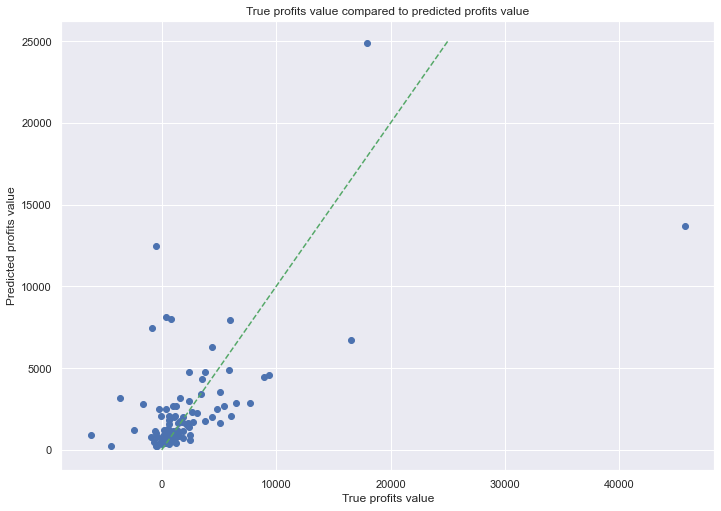

In [1022]:
plt.scatter(y5_test, predictions5)
plt.plot([0,10000,25000],[0, 10000,25000], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

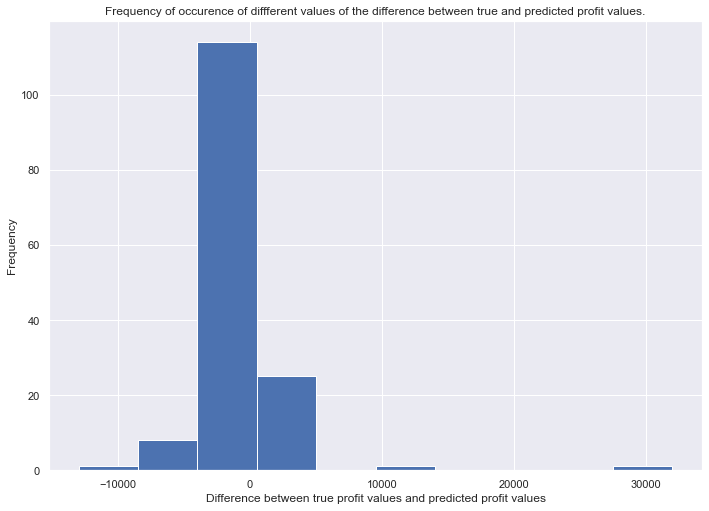

In [1023]:
plt.hist(y5_test - predictions5)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

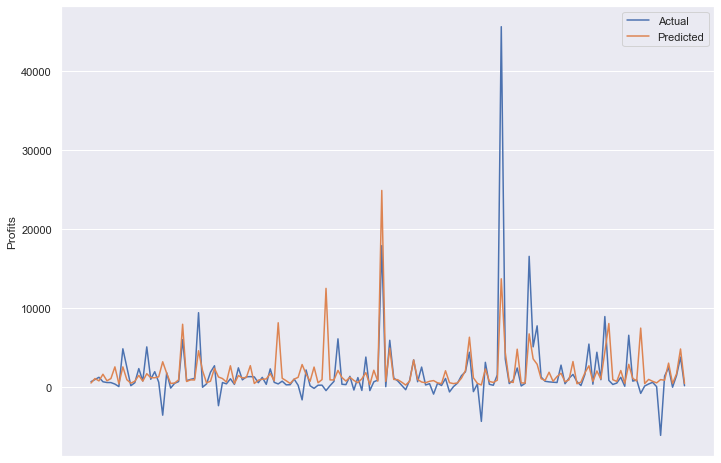

In [1024]:
pred5_df = pd.DataFrame(predictions5)
x5_df = pd.DataFrame(x5_test.iloc[:,0])

plt.plot(range(len(y5_test)), y5_test)
plt.plot(range(len(predictions5)), predictions5)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()


In [1025]:
mae = metrics.mean_absolute_error(y5_test, predictions5)
mse = metrics.mean_squared_error(y5_test, predictions5)
r2 = metrics.r2_score(y5_test, predictions5)
print('-----------------------------------------------')
print(f"Negative root mean squared error': mean: {scores5.mean()} standard deviation: {scores5.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negative root mean squared error': mean: -4058.7888212355265 standard deviation: 2820.6597183774243
-----------------------------------------------
R2 score =  0.3859614349999041
-----------------------------------------------
Mean absolute error =  1483.3852982986466
-----------------------------------------------
Mean squared error =  12576275.179644724
-----------------------------------------------


### Model 1.6 <a class="anchor" id="model1.6"></a>
Model where outliers have been removed, data is scaled and there are 6 features used.

[Back to contents](#contents)

In [1026]:
df_no_out = df.drop([1, 2, 20, 24, 25, 26, 0, 3, 8, 29])
df_no_out.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 490 entries, 4 to 499
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rank         490 non-null    int64  
 1   Title        490 non-null    object 
 2   Employees    490 non-null    int64  
 3   Sector       490 non-null    object 
 4   Industry     490 non-null    object 
 5   Hqcity       490 non-null    object 
 6   Hqstate      490 non-null    object 
 7   Revenues     490 non-null    int64  
 8   Revchange    490 non-null    float64
 9   Profits      490 non-null    float64
 10  Prftchange   490 non-null    float64
 11  Assets       490 non-null    int64  
 12  Totshequity  490 non-null    float64
dtypes: float64(4), int64(4), object(5)
memory usage: 53.6+ KB


In [1027]:
df_scaled = df_no_out[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits']]
df_scaled = StandardScaler().fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange' ,'Profits'])
X6= df_scaled[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y6 = df_scaled['Profits']
print(X6)
print('-----------------------------------------------')
print(y6)
print('-----------------------------------------------')

     Employees  Revenues    Assets  Totshequity  Revchange  Prftchange
0     0.278342  6.303331 -0.021002    -0.077202   0.119465    0.039323
1     2.658880  6.022231  0.314013     1.827107   0.691657   -0.009994
2     2.276819  5.753372  0.170656     1.733417   0.597121   -0.039309
3     2.585407  5.343650  0.814055     2.187985   0.268732   -0.045722
4     2.232735  4.807697  0.896288     1.236414  -0.114388   -0.099161
..         ...       ...       ...          ...        ...         ...
485  -0.265362 -0.581360 -0.296181    -0.766387   0.099562   -0.035186
486  -0.659179 -0.582352 -0.257803    -0.381827   1.000143   -0.033660
487  -0.595992 -0.582389 -0.063885     1.358329   0.010002   -0.033660
488  -0.655785 -0.582573 -0.230344    -0.228185   0.010002   -0.033660
489   0.895518 -0.583271 -0.295509    -0.593021  -0.328338   -0.079770

[490 rows x 6 columns]
-----------------------------------------------
0      0.332215
1      2.177311
2      1.518209
3      3.111684
4      1.238

In [1028]:
cv = KFold(n_splits=5, random_state=1, shuffle=True) 

In [1029]:
x6_train, x6_test, y6_train, y6_test = train_test_split(X6 , y6, test_size = 0.3)

In [1030]:
regr = linear_model.LinearRegression()
regr.fit(x6_train, y6_train)
scores6 = cross_val_score(regr, x6_test, y6_test, cv=6, scoring = 'neg_root_mean_squared_error')

In [1031]:
predictions6 = regr.predict(x6_test)
pd.DataFrame(regr.coef_, ['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange'], columns = ['Coefficient'])

,Coefficient
Employees,0.224399
Revenues,0.162117
Assets,0.188372
Totshequity,0.293156
Revchange,0.058981
Prftchange,0.035685


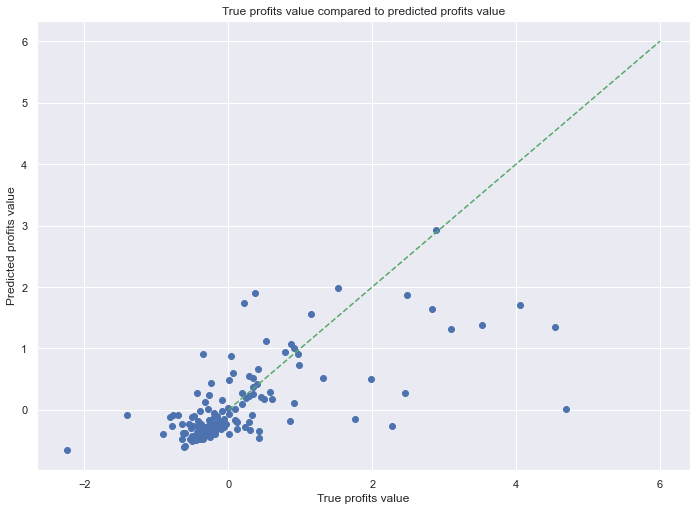

In [1032]:
plt.scatter(y6_test, predictions6)
plt.plot([0,1,6],[0, 1,6], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()

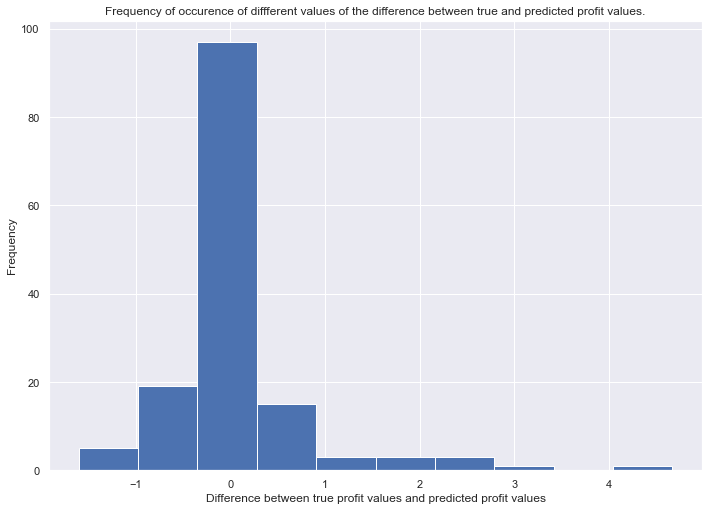

In [1033]:
plt.hist(y6_test - predictions6)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

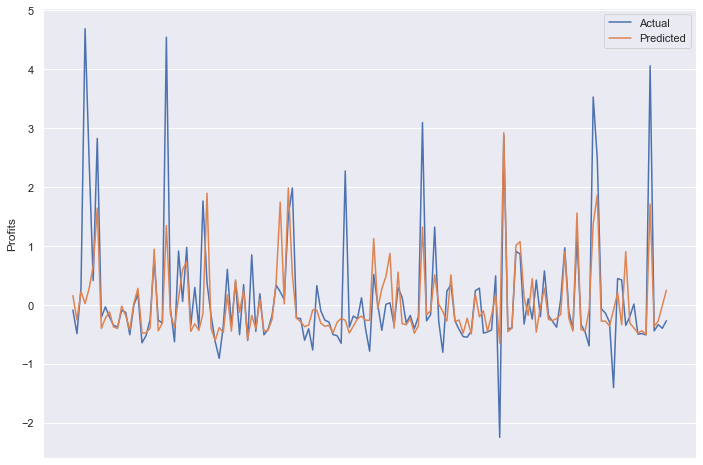

In [1034]:
pred6_df = pd.DataFrame(predictions6)
x6_df = pd.DataFrame(x6_test.iloc[:,0])

plt.plot(range(len(y6_test)), y6_test)
plt.plot(range(len(predictions6)), predictions6)
plt.ylabel('Profits')
plt.legend(['Actual', 'Predicted'])
plt.xticks(())

plt.show()

In [1035]:
mae = metrics.mean_absolute_error(y6_test, predictions6)
mse = metrics.mean_squared_error(y6_test, predictions6)
r2 = metrics.r2_score(y6_test, predictions6)
print('-----------------------------------------------')
print(f"Negative root mean squared error': mean: {scores6.mean()} standard deviation: {scores6.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae))
print('-----------------------------------------------')
print('Mean squared error = ',(mse))
print('-----------------------------------------------')

-----------------------------------------------
Negative root mean squared error': mean: -0.7982123102065489 standard deviation: 0.2244925446292966
-----------------------------------------------
R2 score =  0.4366928979749969
-----------------------------------------------
Mean absolute error =  0.4104337652118698
-----------------------------------------------
Mean squared error =  0.5971581645595732
-----------------------------------------------


## Model 2 - Multi-layer Perceptron

Multi-layer Perceptrons are a type of neural network inspired by the neurons in the brain, using nodes
to calculate and combine results with others through shared connections .
A Multi-layer Perceptron model is made up of multiple layers of Perceptrons. Each Perceptron
takes inputs, multiplies them by a weight and sums them together and adds a bias coefficient. The
sum is passed to an activation function, such as a threshold function .  To begin with, the weights are random but after some
training, the model adjusts the weights using Stochastic Gradient Decent, so it minimizes incorrect
classifications. It
contains hidden layers of Perceptrons stacked together. This allows the model to take any arbitrary activation function, unlike a single Perceptron which must take a linear activation function. This means
it can handle more complex regression problems, which require more flexible decision boundaries. The
process of taking an output of one Perceptron and using it as the input for the next Perceptron in the
hidden layer describes a feedforward algorithm. However, to learn and improve the weights needed
to maximise correct classification the algorithm must backpropagate. Backpropagation iteratively
modifies the weights using Stochastic Gradient Descent, as mentioned above. First, a loss function,
such as Mean Squared Error, is computed for all input and output sets. Then the weights of the
first hidden layer are adjusted to the value produced by the algorithm. The process of adjusting the
weights for each input-output layer continues until the loss is minimised which means the algorithm has
converged over some defined threshold.

In [702]:
from sklearn.neural_network import MLPRegressor

### Model 2.1 <a class="anchor" id="model2.1"></a>
Multilayer Perceptron using 6 features on unscaled data.

[Back to contents](#contents)

In [1177]:
#Setting X as the variables Employees, Revenues, Assets, Total Shared Equity and Profit Change to predict y.
#Setting y as the target value to predict Profit.
X7 = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y7 = df['Profits']
print(X7)
print('-----------------------------------------------')
print(y7)
print('-----------------------------------------------')

     Employees  Revenues  Assets  Totshequity  Revchange  Prftchange
0      2300000    485873  198825      77798.0        0.8        -7.2
1       367700    223604  620854     283001.0        6.1         0.0
2       116000    215639  321686     128249.0       -7.7       -14.4
3        72700    205004  330314     167325.0      -16.7       -51.5
4        68000    192487   56563       8924.0        6.2        53.0
..         ...       ...     ...          ...        ...         ...
495      31000      5197    2148      -1698.0        5.8         4.2
496       4200      5170    9737       4229.0       23.9         5.2
497       8500      5169   48083      31049.0        4.0         5.2
498       4431      5164   15167       6597.0        4.0         5.2
499     110000      5145    2281        974.0       -2.8       -25.0

[500 rows x 6 columns]
-----------------------------------------------
0      13643.0
1      24074.0
2      45687.0
3       7840.0
4       2258.0
        ...   
495      3

In [1178]:
X7_train,X7_test,Y7_train,Y7_test = train_test_split(X7,y7,test_size=0.3)
print('Training Data: ')
print(X7_train)
print('350 rows')
print('----------------------------------------------')
print('Testing Data: ')
print(X7_test)
print('150 rows')


Training Data: 
     Employees  Revenues  Assets  Totshequity  Revchange  Prftchange
204     260200     13487   14262      10728.0        8.6        -4.3
304      27000      9071    8835       3218.3       13.1       -80.6
141      24000     20143    8861       1751.0        4.0         5.2
198       8516     13982    6948       1046.0        7.6         5.3
449      14000      5779    5777       1760.0        0.6         2.9
..         ...       ...     ...          ...        ...         ...
454      16487      5722  123449      16487.0       14.5        21.8
250      48950     11361   12057       4575.0      -10.6       -20.3
306      12380      9061    4360       1229.0       -4.6       117.4
295      36000      9480   19155       1075.0      -10.0      -279.9
150     148400     18558    9901       3057.0        1.9        30.8

[350 rows x 6 columns]
350 rows
----------------------------------------------
Testing Data: 
     Employees  Revenues  Assets  Totshequity  Revchange  Prf

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warn

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  war

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warni

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/extmath.py:153: RuntimeWarning: overflow encountered in matmul
  ret = a @ b
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reac

{'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 500, 'solver': 'adam'}
-----------------------------------------------
Negative root mean squared error: mean: -5160.583710304484 standard deviation: 4291.039814336105
-----------------------------------------------
R2 score =  -1.2911044670834162
-----------------------------------------------
Mean absolute error =  1655.1458100258606
-----------------------------------------------
Mean squared error =  21479072.054986943
-----------------------------------------------


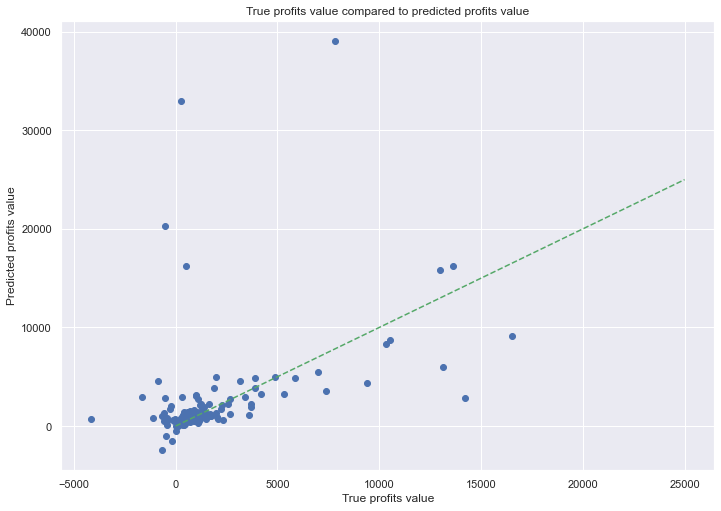

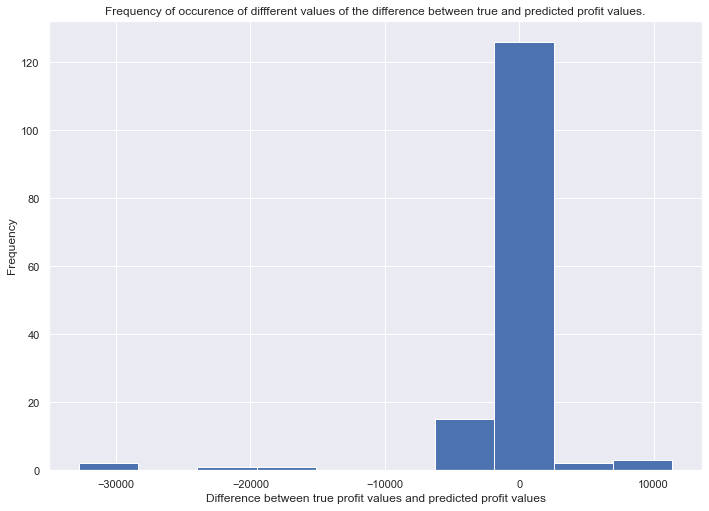

In [1193]:

mlp = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(200,), (150,), (120,), (100,)],
    'max_iter': [500, 1000],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=5)
grid.fit(X7_train, Y7_train)

print(grid.best_params_) 
predictions7 = grid.predict(X7_test) 
scores7 = cross_val_score(mlp, X7_test, Y7_test, cv=6, scoring = 'neg_root_mean_squared_error')
mae7 = metrics.mean_absolute_error(Y7_test, predictions7)
mse7 = metrics.mean_squared_error(Y7_test, predictions7)
r2_7 = metrics.r2_score(Y7_test, predictions7)
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores7.mean()} standard deviation: {scores7.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2_7))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae7))
print('-----------------------------------------------')
print('Mean squared error = ',(mse7))
print('-----------------------------------------------')
plt.scatter(Y7_test, predictions7)
plt.plot([0,10000,25000],[0, 10000,25000], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()
plt.hist(Y7_test - predictions7)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

### Model 2.2 <a class="anchor" id="model2.2"></a>
Multilayer Perceptron with 6 features and scaled data.

[Back to contents](#contents)

In [1152]:
df_scaled = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits']]
df_scaled = StandardScaler().fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange' ,'Profits'])
X8= df_scaled[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y8 = df_scaled['Profits']
print(X8)
print('-----------------------------------------------')
print(y8)
print('-----------------------------------------------')

     Employees   Revenues    Assets  Totshequity  Revchange  Prftchange
0    18.192467  12.056745  0.438399     2.104046  -0.148289   -0.052097
1     2.524557   5.208811  2.000571     8.833642   0.117408   -0.040993
2     0.483666   5.000843  0.893178     3.758577  -0.574408   -0.063202
3     0.132572   4.723159  0.925115     5.040068  -1.025592   -0.120421
4     0.094462   4.396336 -0.088195    -0.154665   0.122421    0.040749
..         ...        ...       ...          ...        ...         ...
495  -0.205550  -0.493871 -0.289616    -0.503012   0.102369   -0.034515
496  -0.422855  -0.494576 -0.261525    -0.308637   1.009750   -0.032973
497  -0.387989  -0.494602 -0.119584     0.570920   0.012132   -0.032973
498  -0.420982  -0.494732 -0.241426    -0.230979   0.012132   -0.032973
499   0.435016  -0.495228 -0.289124    -0.415384  -0.328763   -0.079550

[500 rows x 6 columns]
-----------------------------------------------
0       3.015930
1       5.667686
2      11.162118
3       1.540

In [1153]:
X8_train,X8_test,Y8_train,Y8_test = train_test_split(X8,y8,test_size=0.3)
print('Training Data: ')
print(X8_train)
print('350 rows')
print('----------------------------------------------')
print('Testing Data: ')
print(X8_test)
print('150 rows')


Training Data: 
     Employees  Revenues    Assets  Totshequity  Revchange  Prftchange
369  -0.296405 -0.436062 -0.271034    -0.356288  -0.228500   -0.102530
27    0.467450  1.598169  0.419406     1.913803  -0.629552    0.017306
280  -0.067706 -0.364207 -0.240023    -0.175457  -0.088131    0.595818
178   0.179601 -0.227023 -0.211820    -0.376424  -0.093144   -0.033281
9     1.172883  3.333984  0.583227     0.509299  -0.113197   -0.099137
..         ...       ...       ...          ...        ...         ...
356  -0.325554 -0.429979  0.529302     0.091198   0.693921    0.006047
379  -0.156899 -0.445018 -0.274055    -0.393116  -0.153302    0.023475
146  -0.254200 -0.122320 -0.172798     0.083196   0.678882    0.244022
91   -0.383935  0.163927 -0.086663     0.172070  -0.534302   -0.080167
188  -0.445040 -0.244308 -0.275539    -0.433093  -3.070961   -0.043769

[350 rows x 6 columns]
350 rows
----------------------------------------------
Testing Data: 
     Employees  Revenues    Assets  T

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnin

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnin

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/Users/ursulamennear/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warning

{'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'}
-----------------------------------------------
Negative root mean squared error: mean: -0.537390331937597 standard deviation: 0.19320494164125837
-----------------------------------------------
R2 score =  0.529307843494091
-----------------------------------------------
Mean absolute error =  0.3215306169790056
-----------------------------------------------
Mean squared error =  0.3514439880164748
-----------------------------------------------


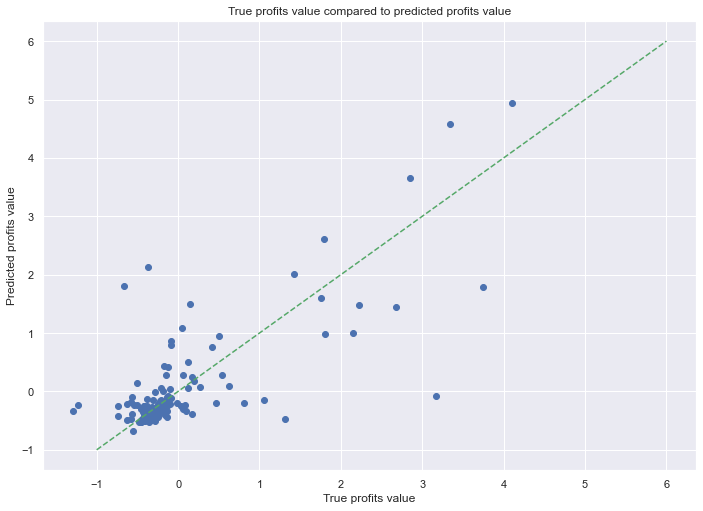

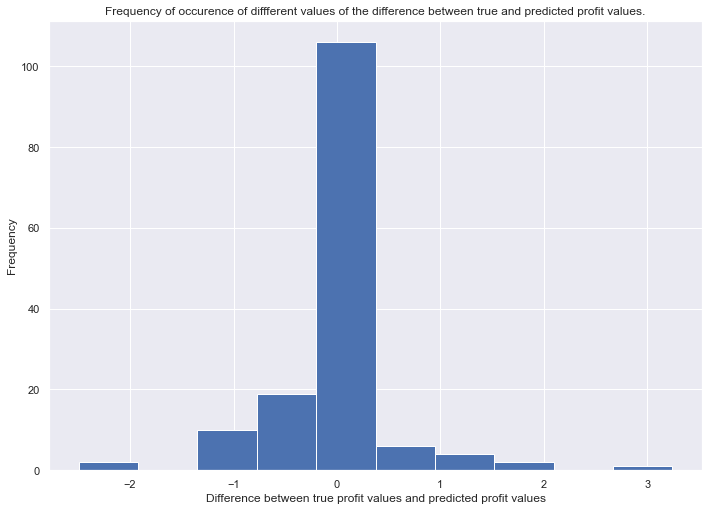

In [1194]:
from sklearn.model_selection import GridSearchCV
import warnings

warnings.filterwarnings("ignore")
mlp = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': [(200,), (150,), (120,), (100,)],
    'max_iter': [500, 1000],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}
grid = GridSearchCV(mlp, param_grid, n_jobs= -1, cv=5)
grid.fit(X8_train, Y8_train)

print(grid.best_params_) 
predictions8 = grid.predict(X8_test) 
scores8 = cross_val_score(mlp, X8_test, Y8_test, cv=6, scoring = 'neg_root_mean_squared_error')
mae8 = metrics.mean_absolute_error(Y8_test, predictions8)
mse8 = metrics.mean_squared_error(Y8_test, predictions8)
r2_8= metrics.r2_score(Y8_test, predictions8)
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores8.mean()} standard deviation: {scores8.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2_8))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae8))
print('-----------------------------------------------')
print('Mean squared error = ',(mse8))
print('-----------------------------------------------')
plt.scatter(Y8_test, predictions8)
plt.plot([-1,1,6],[-1, 1,6], color = 'g', linestyle='dashed', label= "Line to show where predicted profits equal actual profits")
plt.title('True profits value compared to predicted profits value')
plt.xlabel('True profits value')
plt.ylabel('Predicted profits value')
plt.show()
plt.hist(Y8_test - predictions8)
plt.title('Frequency of occurence of diffferent values of the difference between true and predicted profit values.')
plt.xlabel('Difference between true profit values and predicted profit values')
plt.ylabel('Frequency')
plt.show()

# Section 3: Comparing results <a class="anchor" id="section3"></a>
Comparing the most successful model of each type.

[Back to contents](#contents)

The most successful linear regression model was Model 1.2, because it has a a small negaive root mean squared error over cross validation and the R squared score was over 0.5 on almost all runs. The highest r squared score recorded was 0.87.

In [1149]:
mae2 = metrics.mean_absolute_error(y2_test, predictions2)
mse2 = metrics.mean_squared_error(y2_test, predictions2)
r2_2 = metrics.r2_score(y2_test, predictions2)
print('-----------------------------------------------')
print("Linear Regression Model 1.2: 4 features with scaled data.")
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores2.mean()} standard deviation: {scores2.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2_2))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae2))
print('-----------------------------------------------')
print('Mean squared error = ',(mse2))
print('-----------------------------------------------')

-----------------------------------------------
Linear Regression Model 1.2: 4 features with scaled data.
-----------------------------------------------
Negative root mean squared error: mean: -0.6299711990022783 standard deviation: 0.4322145670772607
-----------------------------------------------
R2 score =  0.5264293469574413
-----------------------------------------------
Mean absolute error =  0.27009261092725895
-----------------------------------------------
Mean squared error =  0.2520722214947627
-----------------------------------------------


The most successful multilayer perceptron model was Model 2.2 with hyperparameters {'activation': 'tanh', 'alpha': 0.05, 'hidden_layer_sizes': (200,), 'learning_rate': 'constant', 'max_iter': 1000, 'solver': 'sgd'} because it had a low negative root mean squared error with a low standard diviation and a R squared score above 0.5.

In [1198]:
scores8 = cross_val_score(mlp, X8_test, Y8_test, cv=6, scoring = 'neg_root_mean_squared_error')
mae8 = metrics.mean_absolute_error(Y8_test, predictions8)
mse8 = metrics.mean_squared_error(Y8_test, predictions8)
r2_8= metrics.r2_score(Y8_test, predictions8)
print('-----------------------------------------------')
print("Multi-layer Perceptron Model 2.2: 6 features with scaled data.")
print('-----------------------------------------------')
print(f"Negative root mean squared error: mean: {scores8.mean()} standard deviation: {scores8.std()}")
print('-----------------------------------------------')
print('R2 score = ',(r2_8))
print('-----------------------------------------------')
print('Mean absolute error = ',(mae8))
print('-----------------------------------------------')
print('Mean squared error = ',(mse8))
print('-----------------------------------------------')

-----------------------------------------------
Multi-layer Perceptron Model 2.2: 6 features with scaled data.
-----------------------------------------------
Negative root mean squared error: mean: -0.5217512303982188 standard deviation: 0.20529063867162942
-----------------------------------------------
R2 score =  0.529307843494091
-----------------------------------------------
Mean absolute error =  0.3215306169790056
-----------------------------------------------
Mean squared error =  0.3514439880164748
-----------------------------------------------


In [1199]:
print(f"Negative root mean squared error  difference: mean: {scores2.mean() - scores8.mean()} standard deviation: {scores2.std() -scores8.std()}")
print('-----------------------------------------------')
print('R2 score difference = ',(r2_2 - r2_8))
print('-----------------------------------------------')
print('Mean absolute error difference = ',(mae2 - mae8))
print('-----------------------------------------------')
print('Mean squared error difference = ',(mae2 - mse8))
print('-----------------------------------------------')

Negative root mean squared error  difference: mean: -0.10821996860405947 standard deviation: 0.22692392840563128
-----------------------------------------------
R2 score difference =  -0.002878496536649733
-----------------------------------------------
Mean absolute error difference =  -0.05143800605174664
-----------------------------------------------
Mean squared error difference =  -0.08135137708921586
-----------------------------------------------


This shows that the Mutlilayer perceptron performed better across cross validation as it had a smaller Negative root mean squared error mean and standard diviation so was more constistent. However the linear model had a higher R squared score and a slightly lower mean squared error and mean absolute error. 

In [1200]:
df_scaled = df[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange', 'Profits']]
df_scaled = StandardScaler().fit_transform(df_scaled.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange' ,'Profits'])
X9= df_scaled[['Employees', 'Revenues', 'Assets', 'Totshequity', 'Revchange', 'Prftchange']]
y9 = df_scaled['Profits']
print(X9)
print('-----------------------------------------------')
print(y9)
print('-----------------------------------------------')

     Employees   Revenues    Assets  Totshequity  Revchange  Prftchange
0    18.192467  12.056745  0.438399     2.104046  -0.148289   -0.052097
1     2.524557   5.208811  2.000571     8.833642   0.117408   -0.040993
2     0.483666   5.000843  0.893178     3.758577  -0.574408   -0.063202
3     0.132572   4.723159  0.925115     5.040068  -1.025592   -0.120421
4     0.094462   4.396336 -0.088195    -0.154665   0.122421    0.040749
..         ...        ...       ...          ...        ...         ...
495  -0.205550  -0.493871 -0.289616    -0.503012   0.102369   -0.034515
496  -0.422855  -0.494576 -0.261525    -0.308637   1.009750   -0.032973
497  -0.387989  -0.494602 -0.119584     0.570920   0.012132   -0.032973
498  -0.420982  -0.494732 -0.241426    -0.230979   0.012132   -0.032973
499   0.435016  -0.495228 -0.289124    -0.415384  -0.328763   -0.079550

[500 rows x 6 columns]
-----------------------------------------------
0       3.015930
1       5.667686
2      11.162118
3       1.540

In [1201]:
X9_train,X9_test,Y9_train,Y9_test = train_test_split(X8,y8,test_size=0.3)
print('Training Data: ')
print(X9_train)
print('350 rows')
print('----------------------------------------------')
print('Testing Data: ')
print(X9_test)
print('150 rows')

Training Data: 
     Employees  Revenues    Assets  Totshequity  Revchange  Prftchange
186  -0.341771 -0.235770 -0.060537     0.632017   0.247750   -0.049167
312  -0.227183 -0.397288 -0.190173    -0.299126   2.794435    0.026405
33   -0.336906  1.260718 -0.106370     0.286950  -1.035618   -0.138465
333  -0.442559 -0.414417 -0.288076    -0.434438  -1.196039   -0.901281
323  -0.294742 -0.405722 -0.274695    -0.340153  -0.424013    0.048151
..         ...       ...       ...          ...        ...         ...
171  -0.431248 -0.213889 -0.269354    -0.380917   0.879408   -0.015237
479  -0.446159 -0.488205 -0.286518    -0.414794  -0.489184   -1.417177
17    3.135121  2.381923 -0.162441    -0.227666   0.062263   -0.045774
167   0.280794 -0.202714 -0.174175    -0.376686   0.162527   -0.149261
81    0.467450  0.333410 -0.214752    -0.132234  -0.734829    0.028256

[350 rows x 6 columns]
350 rows
----------------------------------------------
Testing Data: 
     Employees  Revenues    Assets  T

In [1204]:
X9_lin_train = X9_train.drop(columns=['Revchange' , 'Prftchange'])
X9_lin_test = X9_test.drop(columns=['Revchange' , 'Prftchange'])
print('Training Data: ')
print(X9_lin_train)

Training Data: 
     Employees  Revenues    Assets  Totshequity
186  -0.341771 -0.235770 -0.060537     0.632017
312  -0.227183 -0.397288 -0.190173    -0.299126
33   -0.336906  1.260718 -0.106370     0.286950
333  -0.442559 -0.414417 -0.288076    -0.434438
323  -0.294742 -0.405722 -0.274695    -0.340153
..         ...       ...       ...          ...
171  -0.431248 -0.213889 -0.269354    -0.380917
479  -0.446159 -0.488205 -0.286518    -0.414794
17    3.135121  2.381923 -0.162441    -0.227666
167   0.280794 -0.202714 -0.174175    -0.376686
81    0.467450  0.333410 -0.214752    -0.132234

[350 rows x 4 columns]


In [1205]:
predictions9_mlp = grid.predict(X9_test) 
preditctions9_lin = regr.predict(X9_lin_test)

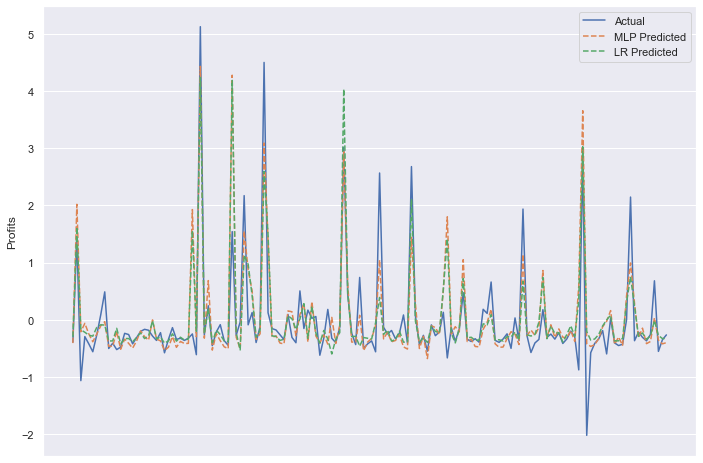

In [1206]:
pred9mlp_df = pd.DataFrame(predictions9_mlp)
pred9lin_df = pd.DataFrame(preditctions9_lin)
x9_df = pd.DataFrame(X9_test.iloc[:,0])

plt.plot(range(len(Y9_test)), Y9_test)
plt.plot(range(len(predictions9_mlp)), predictions9_mlp, linestyle='dashed')
plt.plot(range(len(preditctions9_lin)), preditctions9_lin, linestyle='dashed')
plt.ylabel('Profits')
plt.legend(['Actual', 'MLP Predicted' , 'LR Predicted'])
plt.xticks(())

plt.show()